In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import precision_recall_fscore_support
from prettytable import PrettyTable
import warnings
import time
warnings.filterwarnings("ignore")

In [3]:
# load data
data = np.load('./data.npy',allow_pickle=True)

In [4]:
#game id
#embeddings gen by Resnet
#embeddings generated by VIT
#label name ground truth
# guess time

<h1>Exploratory Data Analysis</h1>

<p>Plotting graphs from the data to get some insights.</p>

In [5]:
# make a graph for visualizing the labels distributions
map_labels = {}
for i in data[:,3]:
    try:
        map_labels[i]+=1
    except:
        map_labels[i]=0

print(map_labels)
print(len(list(map_labels.keys())))

{'sleep': 5, 'oven': 1, 'chair': 20, 'igloo': 4, 'fish': 21, 'fishing': 12, 'radio': 13, 'flute': 25, 'tank': 4, 'keyboard': 11, 'notebook': 7, 'key': 18, 'sweater': 6, 'love': 17, 'pillow': 12, 'laptop': 14, 'sad': 7, 'cow': 12, 'stairs': 13, 'book': 7, 'clock': 16, 'hammer': 18, 'mouse': 14, 'call': 2, 'hard': 2, 'pant': 8, 'gym': 6, 'hit': 5, 'bucket': 15, 'knife': 14, 'cigarette': 8, 'rain': 12, 'snake': 23, 'comb': 9, 'catch': 3, 'tree': 19, 'brush': 12, 'butterfly': 17, 'cry': 3, 'slide': 3, 'calculator': 8, 'telephone': 10, 'rainy': 0, 'wheel': 16, 'cook': 2, 'bee': 6, 'ambulance': 8, 'drive': 3, 'lantern': 3, 'giraffe': 12, 'badminton': 9, 'bicycle': 5, 'sword': 6, 'bullet': 12, 'microwave': 1, 'airplane': 5, 'pencil': 8, 'bird': 6, 'stove': 7, 'starfish': 5, 'truck': 4, 'spoon': 9, 'plant': 6, 'television': 7, 'pear': 1, 'candle': 22, 'eraser': 4, 'sun': 23, 'lizard': 5, 'puppy': 3, 'parachute': 6, 'ladder': 21, 'car': 11, 'arrow': 15, 'close': 1, 'ant': 6, 'helicopter': 7, 'b

In [6]:
print(np.median(np.array(list(map_labels.values()))))

np.array(list(map_labels.values()))

5.0


array([ 5,  1, 20,  4, 21, 12, 13, 25,  4, 11,  7, 18,  6, 17, 12, 14,  7,
       12, 13,  7, 16, 18, 14,  2,  2,  8,  6,  5, 15, 14,  8, 12, 23,  9,
        3, 19, 12, 17,  3,  3,  8, 10,  0, 16,  2,  6,  8,  3,  3, 12,  9,
        5,  6, 12,  1,  5,  8,  6,  7,  5,  4,  9,  6,  7,  1, 22,  4, 23,
        5,  3,  6, 21, 11, 15,  1,  6,  7,  5,  6,  4,  9,  2,  3,  7,  3,
        2, 15,  7,  5,  7,  6,  1,  3,  4, 12,  8,  2, 11,  1,  6, 11,  6,
        8,  8,  5,  9, 10,  1,  3,  5,  5,  3,  3,  3,  4,  1,  8,  2,  3,
        9,  1,  5,  7,  2,  6, 17,  6,  8, 12,  3,  8,  2, 14,  7, 17,  9,
        3, 10, 18,  3, 10,  1,  9,  3,  3,  9,  7,  5,  4, 10,  1,  0,  6,
        2, 12,  5,  3,  2,  1, 17,  3,  6,  5,  3, 10,  1,  2,  1,  5,  2,
        4,  4,  3,  0,  6,  2,  2,  2,  2,  3,  1,  3,  2,  0,  3,  3,  1,
        1,  0,  2,  0,  0,  0])

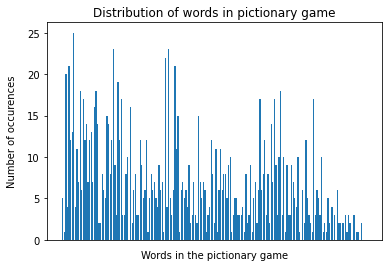

In [7]:
plt.bar(list(map_labels.keys()),list(map_labels.values()),align='center')
plt.xticks([])
plt.title('Distribution of words in pictionary game')
plt.xlabel('Words in the pictionary game',labelpad=10)
plt.ylabel('Number of occurences',labelpad=10)
plt.show()

In [8]:
# sorting the dictionary for getting insights on the most occuring words
map_labels = dict(sorted(map_labels.items(),key=lambda x : x[1],reverse=True))

In [9]:
print(map_labels)

{'flute': 25, 'snake': 23, 'sun': 23, 'candle': 22, 'fish': 21, 'ladder': 21, 'chair': 20, 'tree': 19, 'key': 18, 'hammer': 18, 'door': 18, 'love': 17, 'butterfly': 17, 'boat': 17, 'shoe': 17, 'rose': 17, 'clock': 16, 'wheel': 16, 'bucket': 15, 'arrow': 15, 'table': 15, 'laptop': 14, 'mouse': 14, 'knife': 14, 'pizza': 14, 'radio': 13, 'stairs': 13, 'fishing': 12, 'pillow': 12, 'cow': 12, 'rain': 12, 'brush': 12, 'giraffe': 12, 'bullet': 12, 'mug': 12, 'elephant': 12, 'bed': 12, 'keyboard': 11, 'car': 11, 'toothbrush': 11, 'shark': 11, 'telephone': 10, 'smile': 10, 'happy': 10, 'earth': 10, 'face': 10, 'fork': 10, 'comb': 9, 'badminton': 9, 'spoon': 9, 'toothpaste': 9, 'basket': 9, 'peacock': 9, 'grass': 9, 'tomato': 9, 'tent': 9, 'pant': 8, 'cigarette': 8, 'calculator': 8, 'ambulance': 8, 'pencil': 8, 'finger': 8, 'deer': 8, 'zip': 8, 'potato': 8, 'fire': 8, 'windmill': 8, 'notebook': 7, 'sad': 7, 'book': 7, 'stove': 7, 'television': 7, 'helicopter': 7, 'swim': 7, 'basketball': 7, 'cla

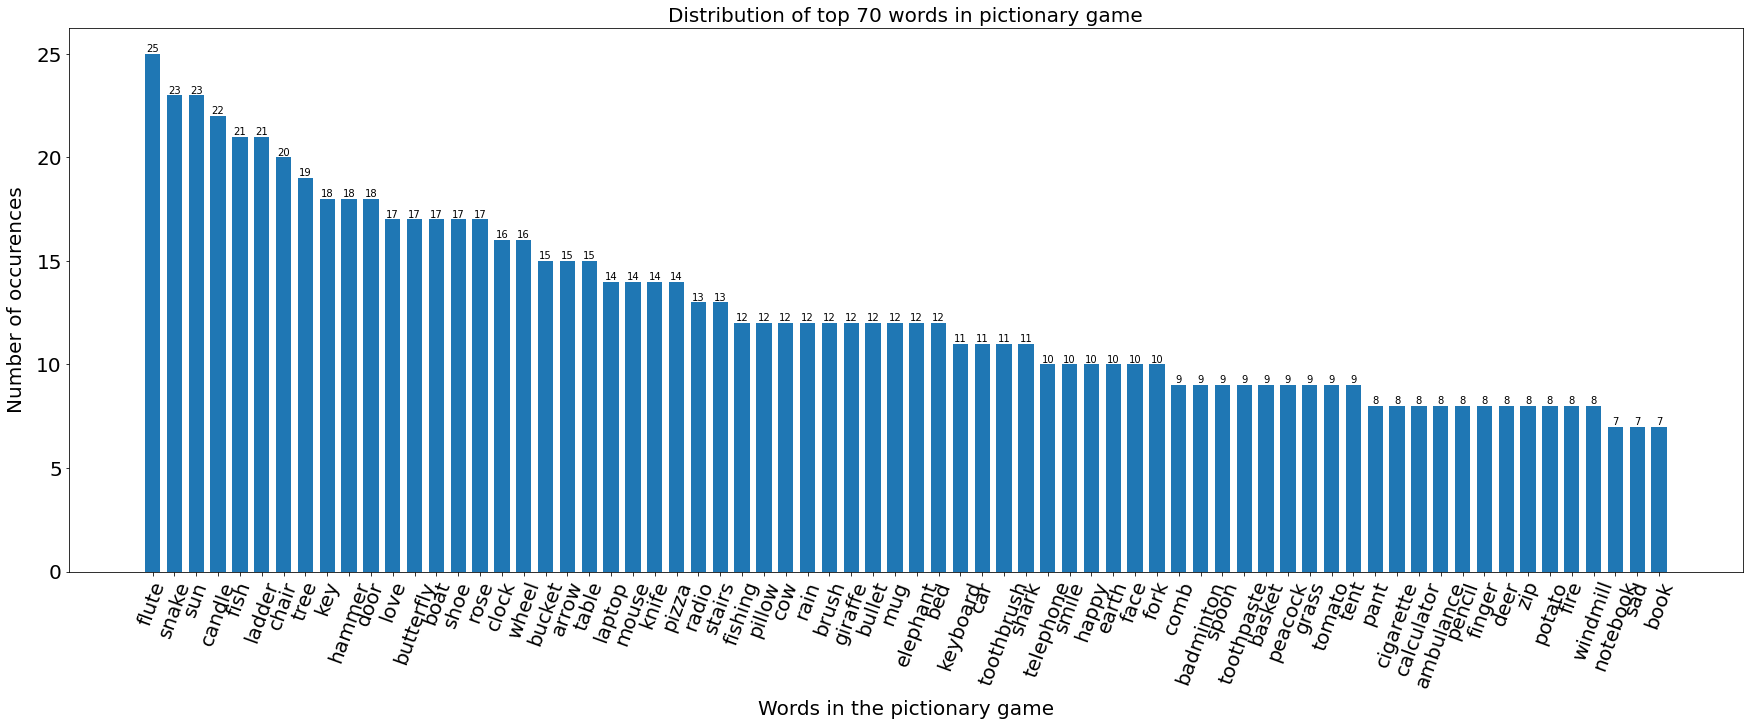

In [10]:
# suppose we need to see top 50 words
custom_viz = 70
# we want to see

plt.figure(figsize=(30,10))
bars = plt.bar(list(map_labels.keys())[:custom_viz],list(map_labels.values())[:custom_viz],align='center',width=0.7)
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20)
plt.title(f'Distribution of top {custom_viz} words in pictionary game',fontsize=20)
plt.bar_label(bars)
plt.xlabel('Words in the pictionary game',labelpad=10,fontsize=20)
plt.ylabel('Number of occurences',labelpad=10,fontsize=20)
plt.show()


In [11]:
print(data.shape)

(1500, 5)


In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(data=data)

In [14]:
df

0  \
0     9f894201-9d0d-4f75-853b-595c0c1bd661   
1     d2b4d879-0345-4df1-a978-eb7f9e8b89f1   
2     aaf0c209-f3a7-4c91-9a09-bc1e30400c4c   
3     5ae313c7-9934-456c-9685-36ef20b712fd   
4     b58bbb2c-461f-4805-856e-cba323f97e8c   
...                                    ...   
1495  b1233fbb-68ee-44a0-a8b8-0b399ad1cacd   
1496  76c1ee48-25b4-4981-b21f-26a3a2b091bb   
1497  9596177d-b182-486e-bbc9-987081647e68   
1498  9ad40994-3c3b-46c0-81b4-05e81589856d   
1499  c3020795-fcda-42e7-bc6e-20658b0ede04   

                                                      1  \
0     [[-0.001002429, 0.047839083, -0.0046581626, 0....   
1     [[-0.013190677, 0.08283211, 0.006474074, 0.001...   
2     [[-0.010499587, 0.047467805, -0.019303396, -0....   
3     [[-0.023966337, 0.024375185, -0.0009961016, -0...   
4     [[-0.018555297, 0.050565578, -0.008821793, 0.0...   
...                                                 ...   
1495  [[0.009528579, 0.044194497, 0.038498692, -0.00...   
1496  [[-0.003666563, 0.028779637, -0.013404611, -0....   
1497  [[0.00709543, 0.037197262, -0.022390455, 0.001...   
1498  [[0.009601502, 0.03150965, -0.010726368, 0.000...   
1499  [[-0.006722372, 0.051088452, -0.006071057, 0.0...   

                                                      2       3          4  
0     [[0.31094703, 0.20213455, -0.16519593, -0.0530...   sleep  33.144312  
1     [[-0.07832227, -0.07557866, -0.05214904, -0.32...    oven  98.512848  
2     [[0.31455985, -0.024428558, 0.33139282, 0.2197...   chair  15.449425  
3     [[0.113364324, -0.23683439, 0.34781978, -0.427...   igloo  43.358541  
4     [[0.22332864, -0.28626534, -0.037617087, -0.17...    fish  14.454734  
...                                                 ...     ...        ...  
1495  [[0.10134661, -0.10768638, 0.23218037, 0.25022...   stove  53.772519  
1496  [[0.29125518, -0.18452865, 0.1506041, 0.092724...  carrot  18.516855  
1497  [[0.19752023, 0.29306346, -0.28130922, -0.3879...  puppet  94.686575  
1498  [[0.3255903, -0.14218077, 0.0856628, 0.4351619...  listen  25.308092  
1499  [[0.323996, 0.3701325, 0.53706473, -0.02763263...    exit  84.846357  

[1500 rows x 5 columns]

In [15]:
df[0]

0       9f894201-9d0d-4f75-853b-595c0c1bd661
1       d2b4d879-0345-4df1-a978-eb7f9e8b89f1
2       aaf0c209-f3a7-4c91-9a09-bc1e30400c4c
3       5ae313c7-9934-456c-9685-36ef20b712fd
4       b58bbb2c-461f-4805-856e-cba323f97e8c
                        ...                 
1495    b1233fbb-68ee-44a0-a8b8-0b399ad1cacd
1496    76c1ee48-25b4-4981-b21f-26a3a2b091bb
1497    9596177d-b182-486e-bbc9-987081647e68
1498    9ad40994-3c3b-46c0-81b4-05e81589856d
1499    c3020795-fcda-42e7-bc6e-20658b0ede04
Name: 0, Length: 1500, dtype: object

In [16]:
df[0] = np.arange(0,data.shape[0])

In [17]:
df[0]

0          0
1          1
2          2
3          3
4          4
        ... 
1495    1495
1496    1496
1497    1497
1498    1498
1499    1499
Name: 0, Length: 1500, dtype: int64

In [18]:
df

0                                                  1  \
0        0  [[-0.001002429, 0.047839083, -0.0046581626, 0....   
1        1  [[-0.013190677, 0.08283211, 0.006474074, 0.001...   
2        2  [[-0.010499587, 0.047467805, -0.019303396, -0....   
3        3  [[-0.023966337, 0.024375185, -0.0009961016, -0...   
4        4  [[-0.018555297, 0.050565578, -0.008821793, 0.0...   
...    ...                                                ...   
1495  1495  [[0.009528579, 0.044194497, 0.038498692, -0.00...   
1496  1496  [[-0.003666563, 0.028779637, -0.013404611, -0....   
1497  1497  [[0.00709543, 0.037197262, -0.022390455, 0.001...   
1498  1498  [[0.009601502, 0.03150965, -0.010726368, 0.000...   
1499  1499  [[-0.006722372, 0.051088452, -0.006071057, 0.0...   

                                                      2       3          4  
0     [[0.31094703, 0.20213455, -0.16519593, -0.0530...   sleep  33.144312  
1     [[-0.07832227, -0.07557866, -0.05214904, -0.32...    oven  98.512848  
2     [[0.31455985, -0.024428558, 0.33139282, 0.2197...   chair  15.449425  
3     [[0.113364324, -0.23683439, 0.34781978, -0.427...   igloo  43.358541  
4     [[0.22332864, -0.28626534, -0.037617087, -0.17...    fish  14.454734  
...                                                 ...     ...        ...  
1495  [[0.10134661, -0.10768638, 0.23218037, 0.25022...   stove  53.772519  
1496  [[0.29125518, -0.18452865, 0.1506041, 0.092724...  carrot  18.516855  
1497  [[0.19752023, 0.29306346, -0.28130922, -0.3879...  puppet  94.686575  
1498  [[0.3255903, -0.14218077, 0.0856628, 0.4351619...  listen  25.308092  
1499  [[0.323996, 0.3701325, 0.53706473, -0.02763263...    exit  84.846357  

[1500 rows x 5 columns]

In [19]:
df[1]

0       [[-0.001002429, 0.047839083, -0.0046581626, 0....
1       [[-0.013190677, 0.08283211, 0.006474074, 0.001...
2       [[-0.010499587, 0.047467805, -0.019303396, -0....
3       [[-0.023966337, 0.024375185, -0.0009961016, -0...
4       [[-0.018555297, 0.050565578, -0.008821793, 0.0...
                              ...                        
1495    [[0.009528579, 0.044194497, 0.038498692, -0.00...
1496    [[-0.003666563, 0.028779637, -0.013404611, -0....
1497    [[0.00709543, 0.037197262, -0.022390455, 0.001...
1498    [[0.009601502, 0.03150965, -0.010726368, 0.000...
1499    [[-0.006722372, 0.051088452, -0.006071057, 0.0...
Name: 1, Length: 1500, dtype: object

In [20]:
#return a series object

df.loc[:,2]

0       [[0.31094703, 0.20213455, -0.16519593, -0.0530...
1       [[-0.07832227, -0.07557866, -0.05214904, -0.32...
2       [[0.31455985, -0.024428558, 0.33139282, 0.2197...
3       [[0.113364324, -0.23683439, 0.34781978, -0.427...
4       [[0.22332864, -0.28626534, -0.037617087, -0.17...
                              ...                        
1495    [[0.10134661, -0.10768638, 0.23218037, 0.25022...
1496    [[0.29125518, -0.18452865, 0.1506041, 0.092724...
1497    [[0.19752023, 0.29306346, -0.28130922, -0.3879...
1498    [[0.3255903, -0.14218077, 0.0856628, 0.4351619...
1499    [[0.323996, 0.3701325, 0.53706473, -0.02763263...
Name: 2, Length: 1500, dtype: object

In [21]:
df.loc[:,2]

0       [[0.31094703, 0.20213455, -0.16519593, -0.0530...
1       [[-0.07832227, -0.07557866, -0.05214904, -0.32...
2       [[0.31455985, -0.024428558, 0.33139282, 0.2197...
3       [[0.113364324, -0.23683439, 0.34781978, -0.427...
4       [[0.22332864, -0.28626534, -0.037617087, -0.17...
                              ...                        
1495    [[0.10134661, -0.10768638, 0.23218037, 0.25022...
1496    [[0.29125518, -0.18452865, 0.1506041, 0.092724...
1497    [[0.19752023, 0.29306346, -0.28130922, -0.3879...
1498    [[0.3255903, -0.14218077, 0.0856628, 0.4351619...
1499    [[0.323996, 0.3701325, 0.53706473, -0.02763263...
Name: 2, Length: 1500, dtype: object

In [22]:
df

0                                                  1  \
0        0  [[-0.001002429, 0.047839083, -0.0046581626, 0....   
1        1  [[-0.013190677, 0.08283211, 0.006474074, 0.001...   
2        2  [[-0.010499587, 0.047467805, -0.019303396, -0....   
3        3  [[-0.023966337, 0.024375185, -0.0009961016, -0...   
4        4  [[-0.018555297, 0.050565578, -0.008821793, 0.0...   
...    ...                                                ...   
1495  1495  [[0.009528579, 0.044194497, 0.038498692, -0.00...   
1496  1496  [[-0.003666563, 0.028779637, -0.013404611, -0....   
1497  1497  [[0.00709543, 0.037197262, -0.022390455, 0.001...   
1498  1498  [[0.009601502, 0.03150965, -0.010726368, 0.000...   
1499  1499  [[-0.006722372, 0.051088452, -0.006071057, 0.0...   

                                                      2       3          4  
0     [[0.31094703, 0.20213455, -0.16519593, -0.0530...   sleep  33.144312  
1     [[-0.07832227, -0.07557866, -0.05214904, -0.32...    oven  98.512848  
2     [[0.31455985, -0.024428558, 0.33139282, 0.2197...   chair  15.449425  
3     [[0.113364324, -0.23683439, 0.34781978, -0.427...   igloo  43.358541  
4     [[0.22332864, -0.28626534, -0.037617087, -0.17...    fish  14.454734  
...                                                 ...     ...        ...  
1495  [[0.10134661, -0.10768638, 0.23218037, 0.25022...   stove  53.772519  
1496  [[0.29125518, -0.18452865, 0.1506041, 0.092724...  carrot  18.516855  
1497  [[0.19752023, 0.29306346, -0.28130922, -0.3879...  puppet  94.686575  
1498  [[0.3255903, -0.14218077, 0.0856628, 0.4351619...  listen  25.308092  
1499  [[0.323996, 0.3701325, 0.53706473, -0.02763263...    exit  84.846357  

[1500 rows x 5 columns]

In [23]:
data.shape

(1500, 5)

In [24]:
# chnging the 0th column to a unique index
data[:,0] = np.arange(0,data.shape[0])

In [25]:
data[:,0]

array([0, 1, 2, ..., 1497, 1498, 1499], dtype=object)

In [26]:
# similarly for 1st column and 2nd column reshape to a single vector dimension

In [27]:
data[:,1] = np.array(data[:,1])

In [28]:
data[:,1].shape

(1500,)

In [29]:
for i in range(data[:,1].shape[0]):
    data[:,1][i] = data[:,1][i].flatten()

# if we do arr in data[:,1], it does'nt work not passing by reference

In [30]:
data[:,1][0].shape

(1024,)

In [31]:
for i in range(data[:,2].shape[0]):
    data[:,2][i] = data[:,2][i].flatten()

# if we do arr in data[:,1], it does'nt work not passing by reference

In [32]:
data[:,2][0].shape

(512,)

In [33]:
data = data[:,:4]
np.save('pre-processed_data.npy',data)

-----------------------------------------------------All the Data Pre processing done now-------------------------------------------------

In [34]:
# load data
data = np.load('pre-processed_data.npy',allow_pickle=True)

In [35]:
print(data.shape)

(1500, 4)


In [36]:
df = pd.DataFrame(data=data)

In [37]:
df

0                                                  1  \
0        0  [-0.001002429, 0.047839083, -0.0046581626, 0.0...   
1        1  [-0.013190677, 0.08283211, 0.006474074, 0.0013...   
2        2  [-0.010499587, 0.047467805, -0.019303396, -0.0...   
3        3  [-0.023966337, 0.024375185, -0.0009961016, -0....   
4        4  [-0.018555297, 0.050565578, -0.008821793, 0.00...   
...    ...                                                ...   
1495  1495  [0.009528579, 0.044194497, 0.038498692, -0.000...   
1496  1496  [-0.003666563, 0.028779637, -0.013404611, -0.0...   
1497  1497  [0.00709543, 0.037197262, -0.022390455, 0.0012...   
1498  1498  [0.009601502, 0.03150965, -0.010726368, 0.0008...   
1499  1499  [-0.006722372, 0.051088452, -0.006071057, 0.00...   

                                                      2       3  
0     [0.31094703, 0.20213455, -0.16519593, -0.05306...   sleep  
1     [-0.07832227, -0.07557866, -0.05214904, -0.321...    oven  
2     [0.31455985, -0.024428558, 0.33139282, 0.21973...   chair  
3     [0.113364324, -0.23683439, 0.34781978, -0.4273...   igloo  
4     [0.22332864, -0.28626534, -0.037617087, -0.175...    fish  
...                                                 ...     ...  
1495  [0.10134661, -0.10768638, 0.23218037, 0.250226...   stove  
1496  [0.29125518, -0.18452865, 0.1506041, 0.0927248...  carrot  
1497  [0.19752023, 0.29306346, -0.28130922, -0.38795...  puppet  
1498  [0.3255903, -0.14218077, 0.0856628, 0.43516198...  listen  
1499  [0.323996, 0.3701325, 0.53706473, -0.027632639...    exit  

[1500 rows x 4 columns]

In [38]:
# Data split for train ,val and test

# Lets make a split of 65 % train , 20 % val, 15 % test

train = int(0.8*data.shape[0])
val = int(0.2*data.shape[0])
test = int(0*data.shape[0])

In [39]:
# np.random.shuffle(data)
# data.shape

In [40]:
df = pd.DataFrame(data=data)

In [41]:
df

0                                                  1  \
0        0  [-0.001002429, 0.047839083, -0.0046581626, 0.0...   
1        1  [-0.013190677, 0.08283211, 0.006474074, 0.0013...   
2        2  [-0.010499587, 0.047467805, -0.019303396, -0.0...   
3        3  [-0.023966337, 0.024375185, -0.0009961016, -0....   
4        4  [-0.018555297, 0.050565578, -0.008821793, 0.00...   
...    ...                                                ...   
1495  1495  [0.009528579, 0.044194497, 0.038498692, -0.000...   
1496  1496  [-0.003666563, 0.028779637, -0.013404611, -0.0...   
1497  1497  [0.00709543, 0.037197262, -0.022390455, 0.0012...   
1498  1498  [0.009601502, 0.03150965, -0.010726368, 0.0008...   
1499  1499  [-0.006722372, 0.051088452, -0.006071057, 0.00...   

                                                      2       3  
0     [0.31094703, 0.20213455, -0.16519593, -0.05306...   sleep  
1     [-0.07832227, -0.07557866, -0.05214904, -0.321...    oven  
2     [0.31455985, -0.024428558, 0.33139282, 0.21973...   chair  
3     [0.113364324, -0.23683439, 0.34781978, -0.4273...   igloo  
4     [0.22332864, -0.28626534, -0.037617087, -0.175...    fish  
...                                                 ...     ...  
1495  [0.10134661, -0.10768638, 0.23218037, 0.250226...   stove  
1496  [0.29125518, -0.18452865, 0.1506041, 0.0927248...  carrot  
1497  [0.19752023, 0.29306346, -0.28130922, -0.38795...  puppet  
1498  [0.3255903, -0.14218077, 0.0856628, 0.43516198...  listen  
1499  [0.323996, 0.3701325, 0.53706473, -0.027632639...    exit  

[1500 rows x 4 columns]

In [42]:
train_data = data[:train]
val_data = data[train:val+train]
test_data = data[train+val:train+val+test]

In [43]:
train_data.shape

(1200, 4)

In [44]:
test_data.shape

(0, 4)

In [45]:
val_data.shape

(300, 4)

<h1>KNN Model</h1>

<p>The description of KNN model and its hyperparameters.</p>

<h1>Best and Optimized KNN Model</h1>

In [51]:
class Distance():
    def __init__(self,k,dm):
        self.distance_metric_set = dm
        pass

    def Euclidean(self,v1,v2):
        return np.sqrt(np.sum((v1-v2)**2,axis=1))
    
    def Manhatten(self,v1,v2):
        return np.sum(np.abs(v1-v2),axis=1)
    
    def Cosine(self,v1,v2):
        return 1 - (np.dot(v1,v2)/(np.linalg.norm(v1,axis=1)*\
            np.linalg.norm(v2)))

mapper_lbl = {k:v for k,v in enumerate(list(np.unique(data[:,-1].flatten())),start=1)}
mapper_lbl_rev = {v:k for k,v in enumerate(list(np.unique(data[:,-1].flatten())),start=1)}


class KNNModel(Distance):
    
    mp_lbl = mapper_lbl
    mp_lbl_rev = mapper_lbl_rev
    
    def __init__(self,k,dm,enc_type,data):
        self.k = k
        self.data = data
        self.samples = data.shape[0]
        self.encoder_type=enc_type
        self.distance_metric = self.distance_metric_finder(dm)
        self.mapper_str_to_int_vectorize = np.vectorize(self.mapper_str_to_int)
                
    def distance_metric_finder(self,dm):
        if dm.lower() == "manhatten":
            return self.Manhatten
        if dm.lower() == "euclidean":
            return self.Euclidean
        if dm.lower() == "cosine":
            return self.Cosine
    
    def mapper_str_to_int(self,label):
        return KNNModel.mp_lbl_rev[label]


    def inference(self,test_samples):
        return_list = []
        
        collection_of_vectors = np.stack(self.data[:,self.encoder_type])
        for test_smpl in test_samples[:,self.encoder_type]:
            
            distances = self.distance_metric(collection_of_vectors,test_smpl)
            labels = self.mapper_str_to_int_vectorize(self.data[:,3])
            
            top_k = np.column_stack((distances, labels))
            
            top_k = top_k[np.argsort(distances)]
            top_k = top_k[:self.k]
            top_k = np.array(top_k)

            unique, counts = np.unique(top_k[:,1], return_counts=True)
            max_freq_count = np.max(counts)
            max_freq_labels = unique[counts == max_freq_count]
            resultant_shortlisted_neighbors = top_k[np.isin(top_k[:, 1], max_freq_labels)]
            return_list.append(resultant_shortlisted_neighbors[np.argmin(resultant_shortlisted_neighbors[:,0])][1])
            
        return return_list
    
    def validation_metrics_table(self,y_true,y_pred):
        a_macro = precision_recall_fscore_support(y_true,y_pred,average='macro')
        a_micro = precision_recall_fscore_support(y_true,y_pred,average='micro')
        a_weighted = precision_recall_fscore_support(y_true,y_pred,average='weighted')

        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        myTable = PrettyTable(["Type","Accuracy","Precision","Recall","F1 - Score"])
        accuracy = round(np.sum(y_pred==y_true)/y_pred.shape[0],3)
        myTable.add_row(["Macro",accuracy,round(a_macro[0],3),round(a_macro[1],3),round(a_macro[2],3)])
        myTable.add_row(["Micro",accuracy,round(a_micro[0],3),round(a_micro[1],3),round(a_micro[2],3)])
        myTable.add_row(["Weighted",accuracy,round(a_weighted[0],3),round(a_weighted[1],3),round(a_weighted[2],3)])

        return myTable

Now, the data is split into 3 parts.

<h2>Max accuracy on Validation set of Model</h2>

In [52]:
# Tuning the hyperparameters k,encoder_type,distance_metric
"""
Possibilities : 

K  = root(sizeof_train_set)
Encoder_type = 2
Distance_metric = 3
"""
L = []
max_accuracy = 0
count=0

for encoder_type in range(1,3):
    for distance_metric in ["euclidean","manhatten","cosine"]:
        for k in range(1,int(math.sqrt(train_data.shape[0])+1)):
            accuracy = 0 
            model = KNNModel(k,distance_metric,encoder_type,train_data)
            outputs = model.inference(val_data)
            accuracy+=np.sum(outputs==model.mapper_str_to_int_vectorize(val_data[:,3]))
            accuracy/=val_data.shape[0]
            accuracy = round(accuracy,3)
            L.append([accuracy,(k,encoder_type,distance_metric)])
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                good_triplet = (k,encoder_type,distance_metric)
            count+=1

print(f"max_accuracy = {max_accuracy} and best triplet = {good_triplet}")

max_accuracy = 0.307 and best triplet = (8, 2, 'euclidean')


<h2>Table of Top - 20 best Hyperparameters</h2>

In [53]:

myTable = PrettyTable(["Rank","k-NN","Encoder","Distance_metric","Accuracy"])

# making a ranklist
L.sort(reverse=True)
encoder_name = ""

sample = L[:20]

for i in range(20):
    
    # encoder type
    if sample[i][1][1] == 1:
        encoder_name = "ResNet"
    else:
        encoder_name = "VIT"
    
    myTable.add_row([i+1,sample[i][1][0],encoder_name,sample[i][1][2],f"{round(sample[i][0]*100,3)}%"])

print(myTable)



+------+------+---------+-----------------+----------+
| Rank | k-NN | Encoder | Distance_metric | Accuracy |
+------+------+---------+-----------------+----------+
|  1   |  10  |   VIT   |    euclidean    |  30.7%   |
|  2   |  9   |   VIT   |    euclidean    |  30.7%   |
|  3   |  8   |   VIT   |    euclidean    |  30.7%   |
|  4   |  8   |   VIT   |    manhatten    |  30.3%   |
|  5   |  9   |   VIT   |      cosine     |  30.0%   |
|  6   |  9   |   VIT   |    manhatten    |  29.7%   |
|  7   |  7   |   VIT   |    manhatten    |  29.7%   |
|  8   |  6   |   VIT   |    manhatten    |  29.7%   |
|  9   |  11  |   VIT   |    manhatten    |  29.3%   |
|  10  |  10  |   VIT   |      cosine     |  29.3%   |
|  11  |  18  |   VIT   |    manhatten    |  29.0%   |
|  12  |  17  |   VIT   |    manhatten    |  29.0%   |
|  13  |  14  |   VIT   |    manhatten    |  29.0%   |
|  14  |  11  |   VIT   |    euclidean    |  29.0%   |
|  15  |  11  |   VIT   |      cosine     |  29.0%   |
|  16  |  

<h2>Printing precision, recall and f1-score for validation set of Best Model</h2>

In [54]:
# Calculating the above metrics for the best model

model = KNNModel(10,"euclidean",2,train_data)
y_pred = []
y_true = []

outputs = model.inference(val_data)
y_pred = outputs
y_true = model.mapper_str_to_int_vectorize(val_data[:,3])

In [55]:
model.validation_metrics_table(y_true,y_pred)

+----------+----------+-----------+--------+------------+
|   Type   | Accuracy | Precision | Recall | F1 - Score |
+----------+----------+-----------+--------+------------+
|  Macro   |  0.307   |   0.215   | 0.209  |   0.189    |
|  Micro   |  0.307   |   0.307   | 0.307  |   0.307    |
| Weighted |  0.307   |   0.354   | 0.307  |   0.288    |
+----------+----------+-----------+--------+------------+

<h2>Plot a Accuracy vs K graph for the best model hyperparameters (others)</h2>

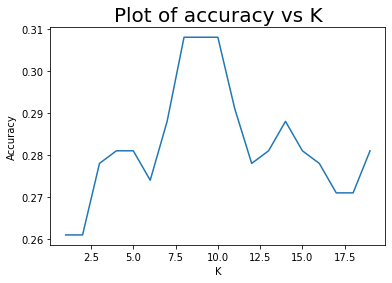

In [58]:
"""
I want to plot on the best model hyperparameters of encoder_type and distance_metric pair 
varying its k
"""
acc_arr = []
for k in range(1,20):
    model= KNNModel(k,"euclidean",2,train_data)
    outputs = model.inference(val_data)
    accuracy+=np.sum(outputs==model.mapper_str_to_int_vectorize(val_data[:,3]))
    
    accuracy/=val_data.shape[0]
    accuracy = round(accuracy,3)
    acc_arr.append(accuracy)

plt.title("Plot of accuracy vs K",fontsize=20)
plt.xlabel("K",fontsize=10)
plt.ylabel("Accuracy",fontsize=10)
plt.plot(np.arange(1,20,1),acc_arr)

plt.show()

<h2>Plot of Inference vs Time</h2>

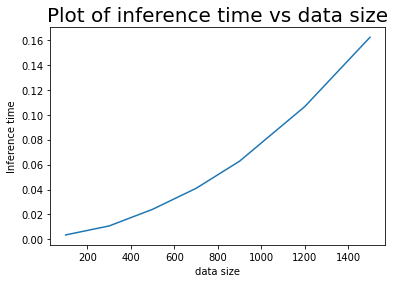

In [61]:
data_size = [100, 300, 500, 700, 900 , 1200 , 1500]
time_per_k = []



for size in data_size:
    dat = data[:size]
    
    train = int(0.8*dat.shape[0])
    val = int(0.2*dat.shape[0])
    test = int(0*dat.shape[0])
    
    train_data = dat[:train]
    val_data = dat[train:val+train]
    test_data = dat[train+val:train+val+test]
    
    knn = KNNModel(8,"euclidean",2,train_data)
    
    start_time = time.time()
    knn.inference(val_data)
    end_time = time.time()
    execution_time = end_time - start_time
    time_per_k.append(execution_time)

plt.title("Plot of inference time vs data size",fontsize=20)
plt.xlabel("data size",fontsize=10)
plt.ylabel("Inference time",fontsize=10)
plt.plot(data_size,time_per_k)

plt.show()

In [62]:
!pip install scikit-multilearn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


<h1>Decision Tree</h1>

<h2>Data Analysis</h2>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

In [64]:
df = pd.read_csv('./advertisement.csv')

In [65]:
df.head(20)

age  gender        income    education  married  children  \
0    45    Male  61271.953359       Master    False         3   
1    24  Female  53229.101074  High School    False         1   
2    45  Female  30066.046684     Bachelor     True         3   
3    19    Male  48950.246384          PhD    False         0   
4    29  Female  44792.627094       Master    False         0   
5    20  Female  51266.767047       Master     True         3   
6    27    Male  29578.136416     Bachelor     True         3   
7    20  Female  35325.309005          PhD    False         3   
8    51    Male  40232.564356          PhD     True         0   
9    19    Male  48053.583882          PhD     True         0   
10   57  Female  60907.844629          PhD     True         0   
11   27  Female  51033.627935          PhD     True         2   
12   63    Male  53402.223923  High School    False         0   
13   44  Female  34683.652618       Master     True         2   
14   51  Female  48815.172160     Bachelor    False         0   
15   42  Female  40527.463149  High School    False         2   
16   39    Male  57062.639298  High School    False         3   
17   25  Female  40668.478951  High School    False         1   
18   47    Male  50144.630720     Bachelor     True         2   
19   47  Female  50595.565055       Master     True         1   

                 city   occupation  purchase_amount most bought item  \
0         Lake Sheila       Doctor        87.697118          monitor   
1        Crystalburgh  Businessman       115.135586         lipstick   
2       Margaretburgh     Engineer       101.694559         biscuits   
3       Williamshaven       Lawyer        97.964887            maggi   
4            New Paul  Businessman        86.847281           carpet   
5           Frankport    Scientist        95.145103           laptop   
6   North Shelbyshire       Lawyer        69.022842            table   
7     South Raventown    Housewife       110.564517       dictionary   
8         Leonardtown     Salesman       107.835490         curtains   
9         South Susan       Artist       108.854898            chips   
10   Gutierrezborough           HR        78.831675            shoes   
11  Lake Tiffanyhaven    Scientist       138.672618            maggi   
12           New Kara    Scientist       118.088573         curtains   
13  West Darlenemouth     Engineer        89.101465              bat   
14    New Anthonytown     Salesman        65.797622         biscuits   
15           Markfurt     Engineer       101.597316           gloves   
16          Scottberg           HR        71.080200           laptop   
17         South Tina  Businessman       124.487105         curtains   
18           Dawnport    Scientist       104.373814         biscuits   
19         Stevenfort  Businessman       112.431977            chips   

                               labels  
0         electronics clothing sports  
1                    furniture beauty  
2    clothing electronics food sports  
3                                food  
4                                home  
5            sports electronics books  
6           beauty furniture clothing  
7                        books beauty  
8        electronics food home sports  
9                      furniture food  
10                      clothing home  
11                         food books  
12                               home  
13         sports furniture food home  
14               beauty clothing food  
15              books clothing sports  
16   electronics furniture food books  
17  furniture electronics home sports  
18               clothing food beauty  
19                     food furniture

In [66]:
df.size

11000

In [67]:
np_ds = np.array(df)

In [68]:
np_ds[0]

array([45, 'Male', 61271.953358890096, 'Master', False, 3, 'Lake Sheila',
       'Doctor', 87.69711834242366, 'monitor',
       'electronics clothing sports'], dtype=object)

In [69]:
unique_labels  = set()

for arr in np_ds:
    lbl_str = arr[-1].split(' ')
    for lbl in lbl_str:
        unique_labels.add(lbl)

print(unique_labels)

{'clothing', 'beauty', 'electronics', 'furniture', 'sports', 'books', 'food', 'home'}


In [70]:
df[df["gender"]=="Female"].head(50)

age  gender        income    education  married  children  \
1    24  Female  53229.101074  High School    False         1   
2    45  Female  30066.046684     Bachelor     True         3   
4    29  Female  44792.627094       Master    False         0   
5    20  Female  51266.767047       Master     True         3   
7    20  Female  35325.309005          PhD    False         3   
10   57  Female  60907.844629          PhD     True         0   
11   27  Female  51033.627935          PhD     True         2   
13   44  Female  34683.652618       Master     True         2   
14   51  Female  48815.172160     Bachelor    False         0   
15   42  Female  40527.463149  High School    False         2   
17   25  Female  40668.478951  High School    False         1   
19   47  Female  50595.565055       Master     True         1   
20   36  Female  34611.512757  High School     True         1   
22   25  Female  46971.308307       Master    False         1   
27   50  Female  45270.638579       Master    False         0   
31   50  Female  40800.945097  High School     True         2   
32   31  Female  57019.169559     Bachelor    False         0   
33   57  Female  62617.100460  High School     True         3   
34   37  Female  58970.417842          PhD    False         2   
35   53  Female  47683.671082  High School     True         0   
38   28  Female  42792.335252     Bachelor     True         2   
39   34  Female  50458.706952     Bachelor    False         1   
43   30  Female  75087.875430     Bachelor     True         0   
44   21  Female  55900.658343     Bachelor     True         0   
46   44  Female  67543.429801          PhD     True         2   
48   46  Female  60468.953352       Master     True         2   
51   37  Female  46212.644202     Bachelor     True         0   
52   58  Female  51057.893167     Bachelor     True         1   
54   54  Female  48484.665228  High School    False         3   
55   35  Female  40317.993846  High School     True         0   
56   42  Female  58886.929583  High School     True         3   
58   29  Female  52268.350643  High School    False         3   
59   59  Female  47076.585366          PhD    False         3   
60   33  Female  63572.503025       Master     True         2   
62   19  Female  50332.892201  High School    False         2   
63   24  Female  44552.098947  High School    False         0   
64   44  Female  42183.725846       Master    False         1   
67   46  Female  39312.647642       Master    False         1   
68   46  Female  40586.188383     Bachelor    False         1   
69   37  Female  43664.679377          PhD     True         0   
71   49  Female  60730.377787       Master     True         0   
73   57  Female  59157.507783  High School    False         0   
76   59  Female  27444.718354          PhD    False         0   
77   28  Female  36344.056143     Bachelor    False         1   
84   39  Female  45885.227816          PhD     True         3   
85   39  Female  62148.036992     Bachelor    False         2   
86   61  Female  49355.042834       Master     True         0   
91   62  Female  43882.131763  High School    False         3   
92   42  Female  56639.407246     Bachelor    False         3   
94   57  Female  72345.800985     Bachelor    False         3   

                 city   occupation  purchase_amount most bought item  \
1        Crystalburgh  Businessman       115.135586         lipstick   
2       Margaretburgh     Engineer       101.694559         biscuits   
4            New Paul  Businessman        86.847281           carpet   
5           Frankport    Scientist        95.145103           laptop   
7     South Raventown    Housewife       110.564517       dictionary   
10   Gutierrezborough           HR        78.831675            shoes   
11  Lake Tiffanyhaven    Scientist       138.672618            maggi   
13  West Darlenemouth     Engineer        89.101465              bat   
14    New Anthonytown     Salesman      

In [71]:
female_df = df[df["gender"]=="Female"]

In [72]:
np_ds_female = np.array(female_df)

map_labels1 = {}

for arr in np_ds_female:
    lbl_str = arr[-1].split(' ')
    for lbl in lbl_str:
        try:
            map_labels1[lbl]+=1
        except:
            map_labels1[lbl]=1

print(map_labels1)

{'furniture': 179, 'beauty': 183, 'clothing': 162, 'electronics': 147, 'food': 173, 'sports': 183, 'home': 172, 'books': 177}


In [73]:
np_ds_female.shape

(506, 11)

In [74]:
print(sum(list(map_labels1.values())))

1376


In [75]:
male_df = df[df["gender"]=="Male"]

In [76]:
np_ds_male = np.array(male_df)

map_labels2 = {}

for arr in np_ds_male:
    lbl_str = arr[-1].split(' ')
    for lbl in lbl_str:
        try:
            map_labels2[lbl]+=1
        except:
            map_labels2[lbl]=1

print(map_labels2)

{'electronics': 185, 'clothing': 172, 'sports': 179, 'food': 170, 'beauty': 173, 'furniture': 157, 'home': 168, 'books': 178}


In [77]:
print(sum(list(map_labels2.values())))

1382


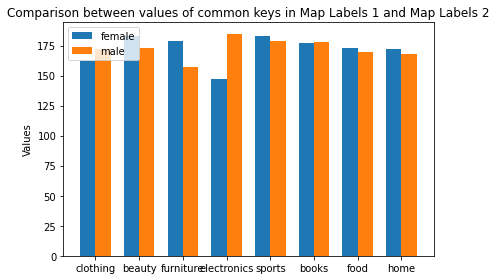

In [78]:

# Find common keys
common_keys = set(map_labels1.keys()) & set(map_labels2.keys())

# Prepare data for plotting
values1 = [map_labels1[key] for key in common_keys]
values2 = [map_labels2[key] for key in common_keys]

# Plotting
import matplotlib.pyplot as plt
import numpy as np

# Setting up the x-axis positions
x = np.arange(len(common_keys))

# Setting up the width for bars
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values1, width, label='female')
rects2 = ax.bar(x + width/2, values2, width, label='male')

# Adding labels, title, and legend
ax.set_ylabel('Values')
ax.set_title('Comparison between values of common keys in Map Labels 1 and Map Labels 2')
ax.set_xticks(x)
ax.set_xticklabels(common_keys)
ax.legend()

fig.tight_layout()
plt.show()

<h2>Dataset Splitting and Qualitative feature handling</h2>

In [79]:
# Splitting  the train val test split
# keeping the ration 70 : 15 : 15
test = 0.00
val = 0.20
train = 0.80

df = pd.read_csv('./advertisement.csv')
data = np.array(df)

In [80]:
print(data.shape)

(1000, 11)


<h2>Using LabelEncoder Routine to encode the categorical features</h2>

In [81]:
"""
We can see column : 1,3,4,6,7,9 are categorical , hence need to be encoded.
"""

for column in [1,3,4,6,7,9]:
    label_encode = LabelEncoder()
    encoded_feature = label_encode.fit_transform(data[:,column])
    data[:,column] = encoded_feature

In [82]:
print(data.shape)

(1000, 11)


<h2>Using the MultiLabelBinarizer Routine to encode the Categorical labels</h2>

In [83]:
label_encode_mlb = MultiLabelBinarizer()

formatted_list = []

for lbl_string in data[:,-1]:
    formatted_list.append(lbl_string.split(' '))
    
encoded_labels = label_encode_mlb.fit_transform(formatted_list)
    
train_x,train_y = data[:int(train*data.shape[0]),:-1],encoded_labels[:int(train*data.shape[0])]
val_x,val_y = data[int(train*data.shape[0]):int(train*data.shape[0])+int(val*data.shape[0]),:-1],encoded_labels[int(train*data.shape[0]):int(train*data.shape[0])+int(val*data.shape[0])]
test_x,test_y = data[int(train*data.shape[0])+int(val*data.shape[0]):int(train*data.shape[0])+int(val*data.shape[0])+int(test*data.shape[0]),:-1],encoded_labels[int(train*data.shape[0])+int(val*data.shape[0]):int(train*data.shape[0])+int(val*data.shape[0])+int(test*data.shape[0])]

print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)
print(val_x.shape,val_y.shape)

(800, 10) (800, 8)
(0, 10) (0, 8)
(200, 10) (200, 8)


In [84]:
label_encode.classes_

array(['ball', 'bat', 'bed', 'biscuits', 'carpet', 'chair', 'chips',
       'cream', 'curtains', 'dictionary', 'encyclopedia', 'gloves',
       'laptop', 'lipstick', 'maggi', 'mobile', 'monitor', 'novel',
       'pants', 'perfume', 'shirt', 'shoes', 'sofa', 'table'],
      dtype=object)

<h2>Dataset dimensions and Split dimensions</h2>

In [85]:
print(train_x.shape,train_y.shape)
print(val_x.shape,val_y.shape)
print(test_y.shape,test_y.shape)

(800, 10) (800, 8)
(200, 10) (200, 8)
(0, 8) (0, 8)


In [86]:
print(train_x)

[[45 1 61271.953358890096 ... 2 87.69711834242366 16]
 [24 0 53229.101073561775 ... 1 115.13558622549095 13]
 [45 0 30066.04668359846 ... 3 101.69455857438264 3]
 ...
 [27 0 47421.56230052875 ... 6 105.39355919621828 23]
 [22 1 49441.02540676641 ... 6 124.51563837634951 23]
 [53 0 27143.854626541364 ... 0 144.55678076749234 18]]


<h1>Data Table Visualization for Decision Tree</h1>

In [88]:
def visualize(y_test,y_pred,results,setting='MultiOutput'):
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Confusion matrix code : commented as it gives a very large confusion matrix
#     conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))  # For multi-label, get the class with the highest probability


"""
Format taken from CHAT GPT

"""
    results.append({
        'Setting': setting,
        'Criterion': criterion,
        'Max Depth': max_depth,
        'Max Features': max_features,
        'Accuracy': accuracy,
        'F1 Macro': f1_macro,
        'F1 Micro': f1_micro,
        'Precision': precision,
        'Recall': recall,
#         'Confusion Matrix': conf_matrix
    })

<h1>MultiOutput Formulation</h1>

In [89]:
class DecisionTreeMultiOutput:
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        base = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion=criterion)
        self.clf = MultiOutputClassifier(base)

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

In [90]:
print(train_y.shape)
print(train_x.shape)

(800, 8)
(800, 10)


<h2>Training and Evaluation</h2>

In [91]:
criterions = ['gini', 'entropy']

max_accuracy = 0
best_params = None

results = []

for max_features in [3,5,7,9,11]:
    for max_depth in [3,5,10,20,30]:
        for criterion in criterions:
            # Using Multioutput approach
            accuracy = 0
            clf = DecisionTreeMultiOutput(max_depth=max_depth, max_features=max_features, criterion=criterion)
            clf.fit(train_x, train_y)
            y_pred = clf.predict(val_x)
            
            visualize(val_y,y_pred,results,'MultiOutput')
            
            for sample_idx in range(val_y.shape[0]):
                accuracy+=(np.sum(y_pred[sample_idx] == val_y[sample_idx])==8)
            accuracy /= val_y.shape[0]

            if accuracy > max_accuracy:
                max_accuracy = accuracy
                best_params = (criterion, max_depth, max_features)

print(f"Maximum Accuracy : {max_accuracy}, Best triplet (Criterion,max_depth,max_features) : {best_params}")

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Adjust display width to avoid wrapping
pd.set_option('display.max_colwidth', 20)  # Limit the width for each individual column

data_viz = pd.DataFrame(results)
print(data_viz)

Maximum Accuracy : 0.105, Best triplet (Criterion,max_depth,max_features) : ('gini', 5, 11)
        Setting Criterion  Max Depth  Max Features  Accuracy  F1 Macro  F1 Micro  Precision    Recall
0   MultiOutput      gini          3             3     0.015  0.178984  0.202605   0.442387  0.125190
1   MultiOutput   entropy          3             3     0.005  0.116880  0.125806   0.471591  0.068344
2   MultiOutput      gini          5             3     0.045  0.266609  0.276423   0.592209  0.187052
3   MultiOutput   entropy          5             3     0.030  0.253040  0.263305   0.600014  0.171972
4   MultiOutput      gini         10             3     0.020  0.434051  0.432161   0.510925  0.384574
5   MultiOutput   entropy         10             3     0.040  0.433872  0.433982   0.515996  0.377012
6   MultiOutput      gini         20             3     0.020  0.431188  0.433778   0.435385  0.432359
7   MultiOutput   entropy         20             3     0.020  0.461032  0.461672   0.455051 

<h1>PowerSet Formulation</h1>

In [107]:
"""
Initial reference from Chat GPT but made up more MYSELF
"""

class DecisionTreePowerset:
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        self.base = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion=criterion)
        self.clf = LabelPowerset(classifier=self.base)

    def fit(self, X, y):
        y_train = self.clf.transform(y)
        self.base.fit(X,y_train)
        

    def predict(self, X):
        return self.clf.predict(X)

In [97]:
criterions = ['gini', 'entropy']
max_depths = [3,5,10,20,30]
max_features_list = [3,5,7,9,11]

max_accuracy = 0
best_params = None

results_pow = []

for max_features in max_features_list:
    for max_depth in max_depths:
        for criterion in criterions:
            accuracy = 0
            # Using Powerset approach
            clf = DecisionTreePowerset(max_depth=max_depth, max_features=max_features, criterion=criterion)
            clf.fit(train_x, train_y)
            y_pred = clf.predict(val_x)
            
            visualize(val_y,y_pred,results_pow,'Powerset')
            
            for sample_idx in range(val_y.shape[0]):
                accuracy+=(np.sum(y_pred[sample_idx] == val_y[sample_idx])==8)
            accuracy /= val_y.shape[0]

            if accuracy > max_accuracy:
                max_accuracy = accuracy
                best_params = (criterion, max_depth, max_features)

print(f"Maximum Accuracy : {max_accuracy}, Best triplet (Criterion,max_depth,max_features) : {best_params}")

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Adjust display width to avoid wrapping
pd.set_option('display.max_colwidth', 20)  # Limit the width for each individual column

data_viz = pd.DataFrame(results_pow)
print(data_viz)

Maximum Accuracy : 0.07, Best triplet (Criterion,max_depth,max_features) : ('entropy', 3, 7)
     Setting Criterion  Max Depth  Max Features  Accuracy  F1 Macro  F1 Micro  Precision    Recall
0   Powerset      gini          3             3     0.025  0.288097  0.320628   0.461112  0.262865
1   Powerset   entropy          3             3     0.015  0.237653  0.273159   0.363293  0.208856
2   Powerset      gini          5             3     0.055  0.240543  0.272160   0.424167  0.188848
3   Powerset   entropy          5             3     0.010  0.279731  0.281046   0.364704  0.230004
4   Powerset      gini         10             3     0.000  0.352857  0.356219   0.411576  0.316264
5   Powerset   entropy         10             3     0.010  0.356592  0.356890   0.360394  0.356418
6   Powerset      gini         20             3     0.000  0.369313  0.370636   0.377379  0.367053
7   Powerset   entropy         20             3     0.010  0.400943  0.402135   0.405443  0.400883
8   Powerset    

<h2>F1 Score top 3 triplets</h2>

In [94]:
final_results = results+results_pow

In [98]:
res_display = sorted(final_results, key=lambda x: x['F1 Micro'], reverse=True)[:3]
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Adjust display width to avoid wrapping
pd.set_option('display.max_colwidth', 20)  # Limit the width for each individual column

data_viz = pd.DataFrame(res_display)
print(data_viz)

       Setting Criterion  Max Depth  Max Features  Accuracy  F1 Macro  F1 Micro  Precision    Recall
0  MultiOutput      gini         20             9     0.045  0.526753  0.527875   0.522628  0.537882
1     Powerset      gini         10            11     0.075  0.522501  0.525703   0.589145  0.479203
2  MultiOutput      gini         30             9     0.035  0.523626  0.525305   0.518528  0.534400


<h2>K Fold Validation</h2>

In [99]:
def train_model(train_data, train_labels):
    model.fit(train_data,train_labels)

def predict(model, test_data):
    return model.predict(test_data)

def accuracy(true_labels, predicted_labels):
    correct = np.sum([np.sum(true_labels[i]==predicted_labels[i])==true_labels[i].shape[0] for i in range(true_labels.shape[0])])
    return correct / len(true_labels)

# Split data into K-Folds
def k_fold_split(data, k=5):
    fold_size = len(data) // k
    folds = []
    for i in range(k):
        if i == k - 1:  # last fold may have a different size if len(data) isn't a multiple of k
            folds.append(data[i*fold_size:])
        else:
            folds.append(data[i*fold_size:(i+1)*fold_size])
    return folds

<h3>Multioutput Validation</h3>

In [105]:
# K-Fold Cross Validation
data_folds = k_fold_split(list(zip(val_x,val_y)), k=5)
accuracies = []

"""
Taken from CHAT GPT

"""

for i in range(5):  # 5-Fold validation as an example
    test_data, test_labels = zip(*data_folds[i])
    train_data = [data for j, fold in enumerate(data_folds) if j != i for data in fold]
    train_data, train_labels = zip(*train_data)

    model = DecisionTreeMultiOutput(max_depth=5, max_features=11, criterion='gini')
    train_model(train_data,train_labels)
    predictions = predict(model, test_data)
    test_labels = np.stack(test_labels)
    fold_accuracy = accuracy(test_labels, predictions)
    accuracies.append(fold_accuracy)

average_accuracy = sum(accuracies) / len(accuracies)
print(f"Average accuracy across the folds for ('entropy',maxdepth=5,max_features=11) Multioutput: {average_accuracy}")

Average accuracy across the folds for ('entropy',maxdepth=5,max_features=11) Multioutput: 0.025


<h3>Powerset Validation</h3> 

In [106]:
# K-Fold Cross Validation
data_folds = k_fold_split(list(zip(val_x,val_y)), k=5)
accuracies = []


"""
Taken from CHAT GPT

"""

for i in range(5):  # 5-Fold validation as an example
    test_data, test_labels = zip(*data_folds[i])
    train_data = [data for j, fold in enumerate(data_folds) if j != i for data in fold]
    train_data, train_labels = zip(*train_data)

    model = DecisionTreeMultiOutput(max_depth=3, max_features=7, criterion='entropy')
    train_model(train_data,train_labels)
    predictions = predict(model, test_data)
    test_labels = np.stack(test_labels)
    fold_accuracy = accuracy(test_labels, predictions)
    accuracies.append(fold_accuracy)

average_accuracy = sum(accuracies) / len(accuracies)
print(f"Average accuracy across the folds for ('entropy',maxdepth=3,max_features=7) Powerset: {average_accuracy}")

Average accuracy across the folds for ('entropy',maxdepth=3,max_features=7) Powerset: 0.030000000000000006


<h1>Principal Component Analysis</h1>

In [19]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from scipy.stats import multivariate_normal
import warnings
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from prettytable import PrettyTable

<h2>Given Template</h2>

In [20]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [21]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [22]:
dirpath = './problem1-dataset'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


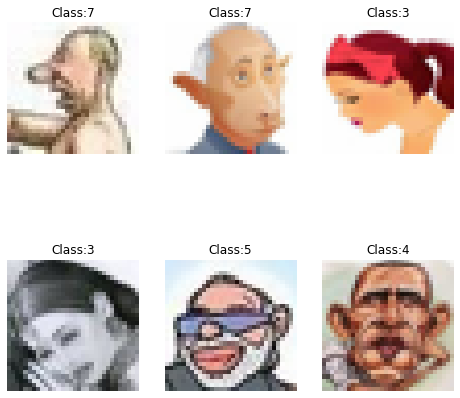

In [23]:
N,H,W = X.shape[0:3]
ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

<h2>My Code</h2>

In [24]:
"""
Converting the images into a 1 D array for PCA
"""

flattened_images = []

for image in X:
    flattened_images.append(image.flatten())
flattened_images = np.stack(flattened_images)

In [25]:
flattened_images.shape

(672, 3072)

In [26]:
data_points,features = flattened_images.shape

<h2>PCA Class</h2>

In [27]:
class PCA:
    
    """
    Standardize the data by subtracting respective means of features
    """
    
    def standardize(self,data_input):
        mean = np.mean(data_input,axis = 0)
        return data_input - mean
    
    """
    Extract the eigen values from X-transpose-X
    X-transpose-X => Covariance matrix
    """
    
    def eigenvalueExtraction(self,data_input):
        std_data = self.standardize(data_input)
        cov_matrix = np.matmul(std_data.T, std_data)
        eigen_vals, eigen_vectors = np.linalg.eig(cov_matrix)
        return std_data,eigen_vals,eigen_vectors
    
    """
    Select k eigen vectors for dimensionality reduction
    """
    
    def dimensionReduction(self,eig_val,eig_vec,k):
        return eig_val[:k],eig_vec[:,:k]
    
    """
    Reconstruction step for the scaled input data (normalized)
    """
    
    def reconstruction(self,scaled_X,eig_vec):
        return np.matmul(scaled_X,eig_vec)

    """
    Master function for applying PCA on a feature vector/vectors
    """
    
    def apply_pca(self,data,k=1):
        A, eigen_vals, eigen_vectors = self.eigenvalueExtraction(data)
        eigen_vals_red , eigen_vectors_red = self.dimensionReduction(eigen_vals,eigen_vectors,k)
        red_output_matrix = self.reconstruction(A,eigen_vectors_red)
        return A,eigen_vals,eigen_vectors,red_output_matrix

In [28]:
pca = PCA()

<h3>Plotting the cummulative variance vs number of PCs</h3>
<ul>
    <li> Variance in each feature (each PC) : Eigen Value</li>
    <li> Number of PC components (X axis) : PC</li>
</ul>

/tmp/ipykernel_218094/656483249.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  eigen_vals = np.asarray(eigen_vals, float)


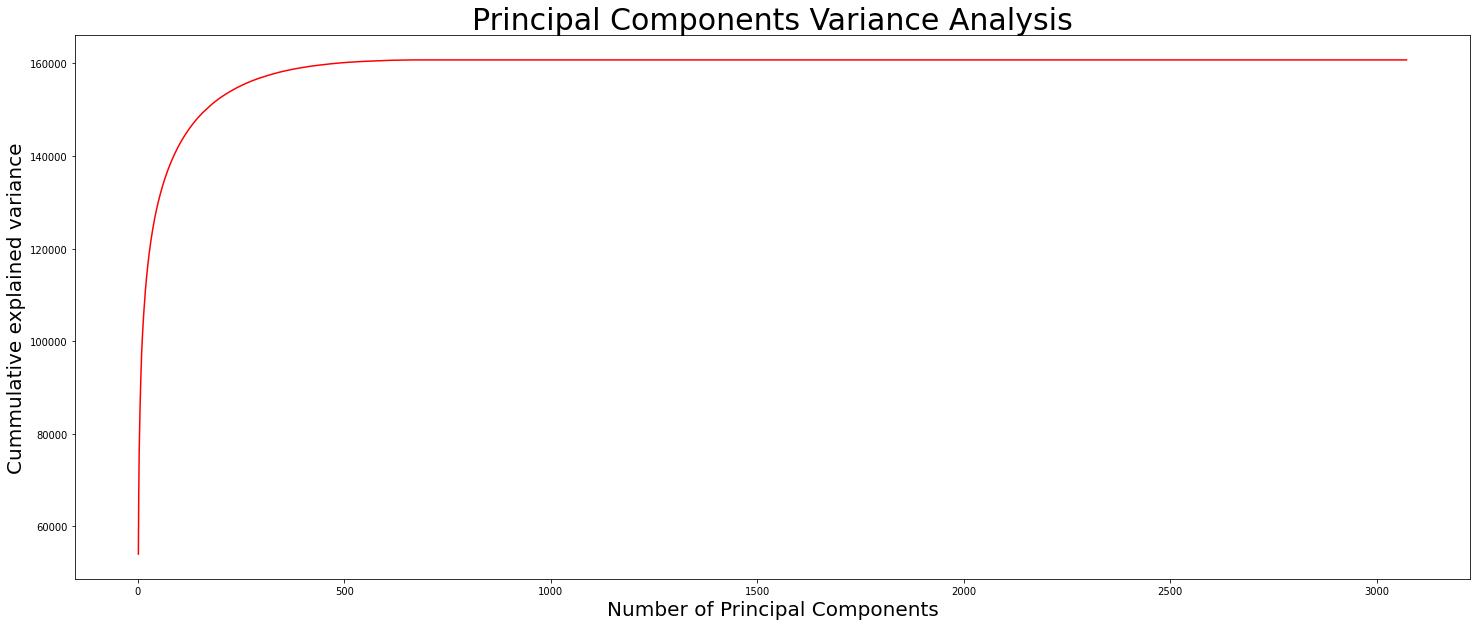

In [11]:
"""
BAR PLOT
"""

_,eigen_vals,_,_ = pca.apply_pca(flattened_images)

# discard imaginary component
eigen_vals = np.asarray(eigen_vals, float)

cummulative_var = np.zeros_like(eigen_vals)
sum_var=0

for i,eig in enumerate(eigen_vals):
    sum_var+=eig
    cummulative_var[i] = sum_var

plt.figure(figsize=(25,10))
plt.plot(np.linspace(1,eigen_vals.shape[0],eigen_vals.shape[0]),cummulative_var,color='r')
plt.xlabel('Number of Principal Components',fontsize=20)
plt.ylabel('Cummulative explained variance',fontsize=20)
plt.title('Principal Components Variance Analysis',fontsize=30)
plt.show()

<h1>Applying Dimensionality reduction on Pictionary dataset</h1>
<ul> 
    <li> Dimensionality Reduction </li>
    <li>Showing all the metrics of KNN Classifier after reduction </li>
</ul>

<h2> Before : Assignment 1 Code (Metrics for Pictionary Dataset)</h2> 

In [12]:
warnings.filterwarnings("ignore")

data = np.load(f'./data.npy',allow_pickle=True)

df = pd.DataFrame(data=data)
df[0] = np.arange(0,data.shape[0])

for i in range(data[:,2].shape[0]):
    data[:,2][i] = data[:,2][i].flatten()

for i in range(data[:,1].shape[0]):
    data[:,1][i] = data[:,1][i].flatten()

data = data[:,:4]

train = int(0.8*data.shape[0])
test = int(0.2*data.shape[0])

train_data = data[:train]
test_data = data[train:train+test]

class Distance():
    def __init__(self,k,dm):
        self.distance_metric_set = dm
        pass

    def Euclidean(self,v1,v2):
        return np.sqrt(np.sum((v1-v2)**2,axis=1))
    
    def Manhatten(self,v1,v2):
        return np.sum(np.abs(v1-v2),axis=1)
    
    def Cosine(self,v1,v2):
        return 1 - (np.dot(v1,v2)/(np.linalg.norm(v1,axis=1)*\
            np.linalg.norm(v2)))



mapper_lbl = {k:v for k,v in enumerate(list(np.unique(data[:,-1].flatten())),start=1)}
mapper_lbl_rev = {v:k for k,v in enumerate(list(np.unique(data[:,-1].flatten())),start=1)}

class KNNModel(Distance):
    
    mp_lbl = mapper_lbl
    mp_lbl_rev = mapper_lbl_rev
    
    def __init__(self,k,dm,enc_type,data):
        self.k = k
        self.data = data
        self.samples = data.shape[0]
        self.encoder_type=enc_type
        self.distance_metric = self.distance_metric_finder(dm)
        self.mapper_str_to_int_vectorize = np.vectorize(self.mapper_str_to_int)
                
    def distance_metric_finder(self,dm):
        if dm.lower() == "manhatten":
            return self.Manhatten
        if dm.lower() == "euclidean":
            return self.Euclidean
        if dm.lower() == "cosine":
            return self.Cosine
    
    def mapper_str_to_int(self,label):
        return KNNModel.mp_lbl_rev[label]


    def inference(self,test_samples):
        return_list = []
        
        collection_of_vectors = np.stack(self.data[:,self.encoder_type])
        for test_smpl in test_samples[:,self.encoder_type]:
            
            distances = self.distance_metric(collection_of_vectors,test_smpl)
            labels = self.mapper_str_to_int_vectorize(self.data[:,3])
            
            top_k = np.column_stack((distances, labels))
            
            top_k = top_k[np.argsort(distances)]
            top_k = top_k[:self.k]
            top_k = np.array(top_k)

            unique, counts = np.unique(top_k[:,1], return_counts=True)
            max_freq_count = np.max(counts)
            max_freq_labels = unique[counts == max_freq_count]
            resultant_shortlisted_neighbors = top_k[np.isin(top_k[:, 1], max_freq_labels)]
            return_list.append(resultant_shortlisted_neighbors[np.argmin(resultant_shortlisted_neighbors[:,0])][1])
            
        return return_list
    
    def validation_metrics_table(self,y_true,y_pred):
        a_macro = precision_recall_fscore_support(y_true,y_pred,average='macro')
        a_micro = precision_recall_fscore_support(y_true,y_pred,average='micro')
        a_weighted = precision_recall_fscore_support(y_true,y_pred,average='weighted')

        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        myTable = PrettyTable(["Type","Accuracy","Precision","Recall","F1 - Score"])
        accuracy = round(np.sum(y_pred==y_true)/y_pred.shape[0],3)
        myTable.add_row(["Macro",accuracy,round(a_macro[0],3),round(a_macro[1],3),round(a_macro[2],3)])
        myTable.add_row(["Micro",accuracy,round(a_micro[0],3),round(a_micro[1],3),round(a_micro[2],3)])
        myTable.add_row(["Weighted",accuracy,round(a_weighted[0],3),round(a_weighted[1],3),round(a_weighted[2],3)])

        return myTable

model = KNNModel(10,"euclidean",2,train_data)
y_pred = []
y_true = []

outputs = model.inference(test_data)
y_pred = outputs
y_true = model.mapper_str_to_int_vectorize(test_data[:,3])

print("Without Dimensionaly Reduction")
print()
print("------------------------------")
print()
print(model.validation_metrics_table(y_true,y_pred))

Without Dimensionaly Reduction

------------------------------

+----------+----------+-----------+--------+------------+
|   Type   | Accuracy | Precision | Recall | F1 - Score |
+----------+----------+-----------+--------+------------+
|  Macro   |  0.307   |   0.215   | 0.209  |   0.189    |
|  Micro   |  0.307   |   0.307   | 0.307  |   0.307    |
| Weighted |  0.307   |   0.354   | 0.307  |   0.288    |
+----------+----------+-----------+--------+------------+


In [13]:
# Let K be the number of principal components
datapts_vit= np.stack(train_data[:,2])
datapts_resnet= np.stack(train_data[:,1])
accuracies = []
temporary_train_data = train_data.copy()
temporary_test_data = test_data.copy()

"""
Number of Principal components to test on : PC
"""
PC = 1000
# change


# We will be testing on the best model which is ViT type
for k in range(1,PC+1):
    # VIT
    _,_,_,dim_red = pca.apply_pca(np.vstack((np.stack(train_data[:,2]),np.stack(test_data[:,2]))),k=k)
    temporary_train_data[:,2] = list(dim_red[:train_data[:,2].shape[0]])
    temporary_test_data[:,2] = list(dim_red[train_data[:,2].shape[0]:])
    
    # ResNet
    _,_,_,dim_red = pca.apply_pca(np.vstack((np.stack(train_data[:,1]),np.stack(test_data[:,1]))),k=k)
    temporary_train_data[:,1] = list(dim_red[:train_data[:,1].shape[0]])
    temporary_test_data[:,1] = list(dim_red[train_data[:,1].shape[0]:])
                                  
    # feeding dimensionally reduced data features in ViT embeddings (best model previously)
    model = KNNModel(10,"euclidean",2,temporary_train_data)
    y_pred = []
    y_true = []

    outputs = model.inference(temporary_test_data)
    y_pred = np.array(outputs)
    y_true = model.mapper_str_to_int_vectorize(temporary_test_data[:,3])

    accuracy = round(np.sum(y_pred==y_true)/y_pred.shape[0],3)
    accuracies.append(accuracy)

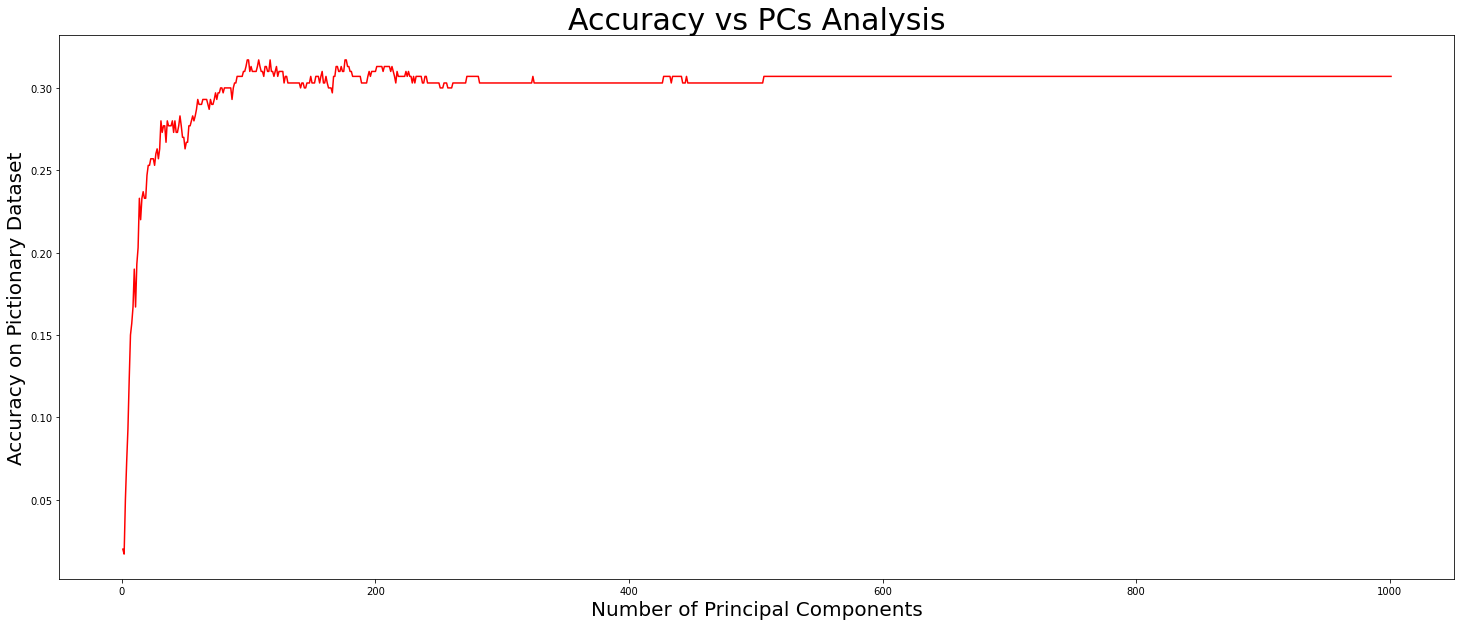

In [14]:
"""
BAR PLOT
"""

plt.figure(figsize=(25,10))
plt.plot(np.linspace(1,PC+1,PC),accuracies,color='r')
plt.xlabel('Number of Principal Components',fontsize=20)
plt.ylabel('Accuracy on Pictionary Dataset',fontsize=20)
plt.title('Accuracy vs PCs Analysis',fontsize=30)
plt.show()

# Observations:

1) PCA reduces the number of features in the dataset while retaining as much variance as possible. This can be particularly useful when we deal with high-dimensional data as in the case of Pictionary Dataset provided to us. Thus we observe that with fewer dimensions in the data generated after PCA, kNN calculations become comparatively quicker, as there are fewer features which have to be considered for generating the distances.

2) We see that in case the number of features after dimensional reduction is around 150-200 features which provide an accuracy > original feature length.

<h2>Pictionary Dataset</h2>

In [15]:
import pandas as pd
import numpy as np

In [16]:
# for drawer
df_drawer = pd.read_csv('./problem1-dataset2/drawer_attributes.csv')
df_drawer

d_drawer  d_area_median  d_stroke_freq_median  d_rangestroketime_median  \
0         10       0.000000              0.000000                     0.000   
1         36   82306.749763              0.578802                    21.660   
2         14   60929.328432              0.239168                    25.087   
3         26  119037.637976              0.402533                    54.162   
4         40       0.000000              0.000000                     0.000   
..       ...            ...                   ...                       ...   
95       489   70962.506524              0.545814                    27.828   
96       476   44293.554261              0.214476                    24.361   
97       491   28575.130088              0.281468                    31.310   
98       504   49562.212555              0.172661                    40.626   
99       505       0.000000              0.000000                     0.000   

    d_firststroketime_median  d_laststroketime_median  d_pcgamestup  \
0                      0.000                    0.000      0.000000   
1                      3.512                   26.815      0.000000   
2                      1.368                   26.455      1.000000   
3                      2.459                   56.621      0.750000   
4                      0.000                    0.000      0.000000   
..                       ...                      ...           ...   
95                     4.873                   34.187      0.200000   
96                     2.619                   26.980      0.250000   
97                     3.671                   37.586      0.153846   
98                    10.302                   47.306      0.400000   
99                     0.000                    0.000      0.000000   

    d_pcgamestdown  d_pcgameserasehighlight  
0         0.000000                 0.000000  
1         0.000000                 0.777778  
2         1.000000                 1.000000  
3         0.500000                 1.000000  
4         0.000000                 0.000000  
..             ...                      ...  
95        0.000000                 0.400000  
96        0.000000                 0.500000  
97        0.076923                 0.461538  
98        0.200000                 0.400000  
99        0.000000                 0.000000  

[100 rows x 9 columns]

In [17]:
drawer = np.array(df_drawer)
drawer = drawer[:,1:]

In [18]:
guesser = np.array(df_guesser)
guesser = guesser[:,1:]

NameError: name 'df_guesser' is not defined

In [ ]:
# for guesser
df_guesser = pd.read_csv('./problem1-dataset2/guesser_attributes.csv')
df_guesser

In [ ]:
guesser.shape

In [ ]:
drawer.shape

In [ ]:
class PCA:
    
    """
    Standardize the data by subtracting respective means of features
    """
    
    def standardize(self,data_input):
        mean = np.mean(data_input,axis = 0)
        return data_input - mean
    
    """
    Extract the eigen values from X-transpose-X
    X-transpose-X => Covariance matrix
    """
    
    def eigenvalueExtraction(self,data_input):
        std_data = self.standardize(data_input)
        cov_matrix = np.matmul(std_data.T, std_data)
        eigen_vals, eigen_vectors = np.linalg.eig(cov_matrix)
        return std_data,eigen_vals,eigen_vectors
    
    """
    Select k eigen vectors for dimensionality reduction
    """
    
    def dimensionReduction(self,eig_val,eig_vec,k):
        return eig_val[:k],eig_vec[:,:k]
    
    """
    Reconstruction step for the scaled input data (normalized)
    """
    
    def reconstruction(self,scaled_X,eig_vec):
        return np.matmul(scaled_X,eig_vec)

    """
    Master function for applying PCA on a feature vector/vectors
    """
    
    def apply_pca(self,data,k=1):
        A, eigen_vals, eigen_vectors = self.eigenvalueExtraction(data)
        eigen_vals_red , eigen_vectors_red = self.dimensionReduction(eigen_vals,eigen_vectors,k)
        red_output_matrix = self.reconstruction(A,eigen_vectors_red)
        return A,eigen_vals,eigen_vectors,red_output_matrix

In [ ]:
pca = PCA()

In [ ]:
_,_,_,drawer_reduced_pca = pca.apply_pca(drawer,k=2)
_,_,_,guesser_reduced_pca = pca.apply_pca(guesser,k=2)

In [ ]:
print(drawer_reduced_pca.shape)
print(guesser_reduced_pca.shape)

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(25,12))

axs[0].set_title("Drawer projections after PCA",fontsize=20)
axs[0].scatter(drawer_reduced_pca[:,0],drawer_reduced_pca[:,1],s=60,color = 'g')

axs[0].set_xlabel('Principal Component 1',fontsize=15)
axs[0].set_ylabel('Principal Component 2',fontsize=15)

axs[1].set_title("Guesser projections after PCA",fontsize=20)
axs[1].scatter(guesser_reduced_pca[:,0],guesser_reduced_pca[:,1] , s=60,color = 'b')

axs[1].set_xlabel('Principal Component 1',fontsize=15)
axs[1].set_ylabel('Principal Component 2',fontsize=15)

In [ ]:
plt.show()

<h3>Points to note in the PCA of Pictionary Dataset</h3>
<ol>
    <li>The axes are denoted by the PC 1and PC2</li>
    <li>The above features are resuced from multidimensional space to 2D space <br>(8 for drawer and 6 for guesser)</li>
</ol>

# Observation

1) After PCA, PC1 i.e. the first principal component captures the most variance of data and indicates the direction in the feature space along which the data varies the most.
 
2) As the Principal components increase, each subsequent features are captured in decreasing amounts of variance.

3) PC2 captures the second most variance and is orthogonal to PC1. It is independent of PC1 and indicates the second-most important pattern or structure in the data. 

In [241]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from scipy.stats import multivariate_normal
import pandas as pd
import sklearn
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [242]:
class PCA:
    
    """
    Standardize the data by subtracting respective means of features
    """
    
    def standardize(self,data_input):
        mean = np.mean(data_input,axis = 0)
        return data_input - mean
    
    """
    Extract the eigen values from X-transpose-X
    X-transpose-X => Covariance matrix
    """
    
    def eigenvalueExtraction(self,data_input):
        std_data = self.standardize(data_input)
        cov_matrix = np.matmul(std_data.T, std_data)
        eigen_vals, eigen_vectors = np.linalg.eig(cov_matrix)
        return std_data,eigen_vals,eigen_vectors
    
    """
    Select k eigen vectors for dimensionality reduction
    """
    
    def dimensionReduction(self,eig_val,eig_vec,k):
        return eig_val[:k],eig_vec[:,:k]
    
    """
    Reconstruction step for the scaled input data (normalized)
    """
    
    def reconstruction(self,scaled_X,eig_vec):
        return np.matmul(scaled_X,eig_vec)

    """
    Master function for applying PCA on a feature vector/vectors
    """
    
    def apply_pca(self,data,k=1):
        A, eigen_vals, eigen_vectors = self.eigenvalueExtraction(data)
        eigen_vals_red , eigen_vectors_red = self.dimensionReduction(eigen_vals,eigen_vectors,k)
        red_output_matrix = self.reconstruction(A,eigen_vectors_red)
        return A,eigen_vals,eigen_vectors,red_output_matrix

<h2>Read Customer dataset</h2>

In [243]:
data = pd.read_csv('./problem2-dataset1/data.csv')

In [244]:
data

Index  Gender  Marital status  Age  Education  Income  Occupation  \
0         0       0               0   67          2  124670           1   
1         1       1               1   22          1  150773           1   
2         2       0               0   49          1   89210           0   
3         3       0               0   45          1  171565           1   
4         4       0               0   53          1  149031           1   
...     ...     ...             ...  ...        ...     ...         ...   
1995   1995       1               0   47          1  123525           0   
1996   1996       1               1   27          1  117744           1   
1997   1997       0               0   31          0   86400           0   
1998   1998       1               1   24          1   97968           0   
1999   1999       0               0   25          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2                   0  
3                   1  
4                   1  
...               ...  
1995                0  
1996                0  
1997                0  
1998                0  
1999                0  

[2000 rows x 8 columns]

In [245]:
data_to_np = np.array(data)
data_to_np.shape

(2000, 8)

In [246]:
# remove index column above which is unrelated to our usecase
processed_data = data_to_np[:,1:]

In [247]:
processed_data.shape

(2000, 7)

In [329]:
# This class made some by ChatGPT
# made some by me
class GMM(PCA):
    def __init__(self):
        self.weights = None
        self.means = None
        self.covariances = None
        self.n_components = None

    def initialize_parameters(self, data, n_components,feature_extract,flag):
        self.n_components = n_components
        self.weights = np.ones(self.n_components) / self.n_components
        self.k = feature_extract
        if flag==0:
            _,_,_,self.reduced_pca_data = self.apply_pca(data,feature_extract)
        else:
            self.reduced_pca_data = data
        self.means = self.reduced_pca_data[np.random.choice(self.reduced_pca_data.shape[0], self.n_components, replace=False), :]
        self.covariances = [np.cov(self.reduced_pca_data, rowvar=False)] * self.n_components

    def e_step(self, data):
        responsibilities = np.zeros((data.shape[0], self.n_components))
        for i in range(self.n_components):
            responsibilities[:, i] = self.weights[i] * multivariate_normal(self.means[i], self.covariances[i]).pdf(data)
        
        responsibilities = responsibilities / responsibilities.sum(axis=1, keepdims=True)
        
        return responsibilities

    def m_step(self, data, responsibilities):
        for i in range(self.n_components):
            weight = responsibilities[:, i].sum()
            mean = (data * responsibilities[:, i, np.newaxis]).sum(axis=0) / weight
            covariance = np.dot((responsibilities[:, i, np.newaxis] * (data - mean)).T, (data - mean)) / weight

            self.weights[i] = weight / data.shape[0]
            self.means[i] = mean
            self.covariances[i] = covariance

    def compute_log_likelihood(self):
        log_likelihood = 0
        for i in range(self.n_components):
            log_likelihood += self.weights[i] * multivariate_normal(self.means[i], self.covariances[i]).pdf(self.reduced_pca_data)
        return np.log(log_likelihood).sum()

    def fit(self, data, n_components,feature_extract=3,tol=1e-4, max_iter=100,flag=0):
        self.initialize_parameters(data, n_components,feature_extract,flag)
        log_likelihood = 0
        for iteration in range(max_iter):
            responsibilities = self.e_step(self.reduced_pca_data)
            self.m_step(self.reduced_pca_data, responsibilities)
            new_log_likelihood = self.compute_log_likelihood()
            
            if abs(new_log_likelihood - log_likelihood) < tol:
                break
            log_likelihood = new_log_likelihood

    def get_parameters(self):
        return {
            "weights": self.weights,
            "means": self.means,
            "covariances": self.covariances
        }

    def predict(self, data):
        likelihoods = np.zeros((data.shape[0], self.n_components))
        for i in range(self.n_components):
            likelihoods[:, i] = self.weights[i] * multivariate_normal(self.means[i], self.covariances[i]).pdf(data)
        return likelihoods

    def predict_membership(self):
        responsibilities = self.e_step(self.reduced_pca_data)
        return responsibilities.argmax(axis=1)

    def compute_aic(self):
        k = self.n_components * (self.reduced_pca_data.shape[1] + self.reduced_pca_data.shape[1] * (self.reduced_pca_data.shape[1] + 1) / 2 + 1)
        log_likelihood = self.compute_log_likelihood()
        aic = 2*k - 2*log_likelihood
        return aic

    def compute_bic(self):
        k = self.n_components * (self.reduced_pca_data.shape[1] + self.reduced_pca_data.shape[1] * (self.reduced_pca_data.shape[1] + 1) / 2 + 1)
        log_likelihood = self.compute_log_likelihood()
        bic = np.log(self.reduced_pca_data.shape[0]) * k - 2 * log_likelihood
        return bic

In [295]:
gmm_model = GMM()
number_of_clusters = 3

In [296]:
gmm_model.fit(processed_data,number_of_clusters)

In [297]:
gmm_model.compute_log_likelihood()

-33340.66214384696

<h2>Parameters for GMM</h2>

In [298]:
dictionary_params = gmm_model.get_parameters()

In [299]:
dictionary_params

{'weights': array([0.33728684, 0.33286486, 0.3298483 ]),
 'means': array([[ 2.65221851e+04, -1.99946637e+00, -4.80738485e-01],
        [ 9.48586752e+02, -5.83333754e+00,  4.98133984e-01],
        [-2.80775596e+04,  7.93124230e+00, -1.11097521e-02]]),
 'covariances': [array([[4.82198755e+08, 3.00957026e+04, 5.35731839e+03],
         [3.00957026e+04, 5.21795888e+01, 1.02536323e+00],
         [5.35731839e+03, 1.02536323e+00, 1.92223769e-01]]),
  array([[4.39083666e+08, 2.97930441e+03, 4.96483350e+02],
         [2.97930441e+03, 2.96928880e+01, 9.92012411e-01],
         [4.96483350e+02, 9.92012411e-01, 5.05398623e-01]]),
  array([[ 1.95595954e+09,  2.48719129e+05,  6.26983415e+03],
         [ 2.48719129e+05,  1.83719449e+02, -1.19965200e-02],
         [ 6.26983415e+03, -1.19965200e-02,  6.41640319e-01]])]}

<h3>Log likelihood graph</h3>

In [ ]:
LL_values = []
for iterations in range(1,105):
    
    gmm_model.fit(processed_data,number_of_clusters,max_iter=iterations)
    LL_values.append(gmm_model.compute_log_likelihood())

# print(len(LL_values))
plt.plot(np.linspace(1,104,104),LL_values)

<h2>Wine dataset using GMM and K means</h2>

In [301]:
(data,target) = load_wine(return_X_y=True, as_frame=False)

In [302]:
data.shape

(178, 13)

In [303]:
df = pd.DataFrame(data)

In [304]:
target.shape

(178,)

In [305]:
df["Labels"] = target

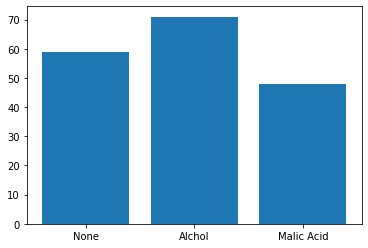

In [306]:
plt.bar(["None","Alchol","Malic Acid"],[df.loc[df["Labels"]==0].shape[0],df.loc[df["Labels"]==1].shape[0], \
                                        df.loc[df["Labels"]==2].shape[0]])
plt.show()

In [307]:
df

0     1     2     3      4     5     6     7     8      9    10  \
0    14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04   
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05   
2    13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03   
3    14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86   
4    13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20  0.59   
176  13.17  2.59  2.37  20.0  120.0  1.65  0.68  0.53  1.46   9.30  0.60   
177  14.13  4.10  2.74  24.5   96.0  2.05  0.76  0.56  1.35   9.20  0.61   

       11      12  Labels  
0    3.92  1065.0       0  
1    3.40  1050.0       0  
2    3.17  1185.0       0  
3    3.45  1480.0       0  
4    2.93   735.0       0  
..    ...     ...     ...  
173  1.74   740.0       2  
174  1.56   750.0       2  
175  1.56   835.0       2  
176  1.62   840.0       2  
177  1.60   560.0       2  

[178 rows x 14 columns]

<h2>Perform K means Clustering</h2>

/home/rohan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


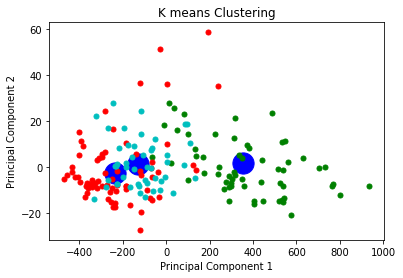

In [308]:
# Let us take the number of clusters as k
k = 3

scaled_data = (data - np.mean(data,axis=0))/np.std(data,axis=0)
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_data)


centroids = kmeans.cluster_centers_
labels = kmeans.labels_


# did -ve of reduced  pca data because my custom pca gives -ve of eigen vectors compared to inbuilt pca

# apply pca to reduce the dimensions to two dimensions
_,_,_,reduced_dim_data_centroids = gmm_model.apply_pca(np.vstack((data,(np.std(data,axis=0)*centroids)+np.mean(data,axis=0))),2)


colors = ["g.", "r.", "c.", "b.", "k.", "o."]


for i in range(len(reduced_dim_data_centroids[:reduced_dim_data_centroids.shape[0] - centroids.shape[0]])):
    plt.plot(-reduced_dim_data_centroids[i][0], -reduced_dim_data_centroids[i][1], colors[target[i]], markersize=10)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('K means Clustering')

plt.scatter(-reduced_dim_data_centroids[reduced_dim_data_centroids.shape[0] - centroids.shape[0] :, 0],-reduced_dim_data_centroids[reduced_dim_data_centroids.shape[0] - centroids.shape[0]: , 1], marker='o',color='b', s=450)
plt.show()

<h2>Tuning the hyperparameter of number of clusters using AIC and BIC scores</h2>

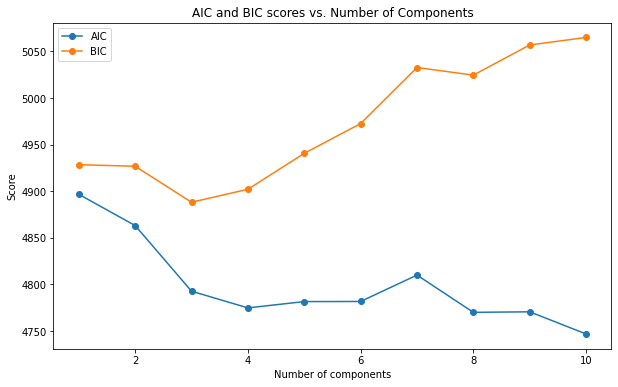

In [310]:
# apply AIC BIC scores

n_clusters = range(1, 11)  # Adjust the range if necessary
aics = []
bics = []

for n_cluster in n_clusters:
    # Initialize and fit the GMM
    gmm_model = GMM()
    gmm_model.fit(data,n_cluster)
    
    # Append AIC and BIC to lists
    aics.append(gmm_model.compute_aic())
    bics.append(gmm_model.compute_bic())

# Plot AIC and BIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_clusters, aics, label='AIC', marker='o')
plt.plot(n_clusters, bics, label='BIC', marker='o')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('AIC and BIC scores vs. Number of Components')
plt.legend()
plt.show()


In the above graph we can observe :
- Number of clusters = 3 yields the best AIC and BIC (simultaneously)


<h2>Plotting the clusters thus formed by GMM</h2>

In [311]:
gmm_model = GMM()
gmm_model.fit(data,3)

In [312]:
# store all the possible cluster id's for which the point has maximum likelihood to belong to
membership_status = gmm_model.predict_membership()
_,_,_,reduced_dimensions = gmm_model.apply_pca(data,2)

In [313]:
membership_status

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0])

In [314]:
reduced_dimensions.shape

(178, 2)

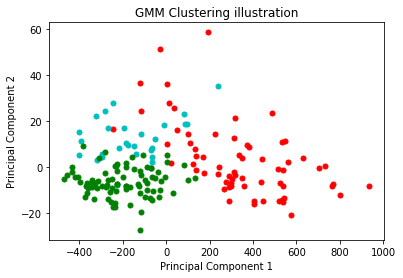

In [315]:
"""
SCATTER PLOT
"""

colors = ["g.", "r.","c."]

for i in range(reduced_dimensions.shape[0]):
    plt.plot(-reduced_dimensions[i,0],-reduced_dimensions[i,1], colors[membership_status[i]],markersize=10)

plt.title('GMM Clustering illustration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

<h2>KNN vs GMM (Silhoutte Scores)</h2>

/home/rohan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rohan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rohan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rohan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

Text(0.5, 1.0, 'Silhoutte score vs number of cluster of KMeans')

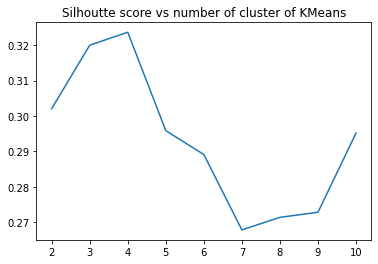

In [316]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_pca = scaler.fit_transform(-gmm_model.reduced_pca_data)


sil_score=[]
for cluster in range(2,11):
    kmeans = KMeans(n_clusters=cluster)
    kmeans_labels = kmeans.fit_predict(std_pca)
    kmeans_silhouette = silhouette_score(std_pca, kmeans_labels)
    
    sil_score.append(kmeans_silhouette)
# #     print(f"KMeans Silhouette Score: {kmeans_silhouette}")

plt.plot(list(range(2,11)),sil_score)
plt.title('Silhoutte score vs number of cluster of KMeans')

Text(0.5, 1.0, 'Silhoutte score vs number of cluster of GMM')

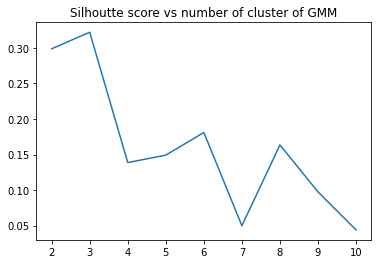

In [336]:
from sklearn.preprocessing import StandardScaler

gmm_model = GMM()
gmm_model.fit(std_pca,n_components = cluster,feature_extract=3)
    
scaler = StandardScaler()
std_pca = scaler.fit_transform(-gmm_model.reduced_pca_data)

sil_score=[]
for cluster in range(2,11):
    gmm_model = GMM()
    gmm_model.fit(std_pca,n_components = cluster,feature_extract=3,flag=1)
    gmm_labels = gmm_model.predict_membership()
    gmm_silhouette = silhouette_score(std_pca, gmm_labels)
    
    sil_score.append(gmm_silhouette)

plt.plot(list(range(2,11)),sil_score)
plt.title('Silhoutte score vs number of cluster of GMM')


## Observations

1) The silhouette score measures how close each data point in one cluster is to the data points in the neighboring clusters. A higher silhouette score indicates that the clusters are well-separated.

2) The best clustering is obtained at k=3 for both Kmeans and GMM algorithm

In [1]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from scipy.stats import multivariate_normal
import pandas as pd
import sklearn
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelBinarizer

<h2>Heirarchial Clustering</h2>

In [50]:
# ChatGPT generated Class

class HierarchicalClustering:
    
    def linkages(self, X, linkage_type='single'):
        """
        Compute linkage matrix.
        
        Parameters:
        - X: numpy array of data points.
        - linkage_type: string, type of linkage ('single', 'complete', 'average', etc.)
        
        Returns:
        - Z: linkage matrix
        """
        return linkage(X, method=linkage_type)

    def dendrogram(self, Z, labels=None):
        """
        Plot dendrogram based on linkage matrix.
        
        Parameters:
        - Z: linkage matrix.
        - labels: list of labels for the data points.
        """
        plt.figure(figsize=(10, 8))
        dendrogram(Z, labels=labels)
        plt.show()

<br>

In [26]:
# using my dataset
hc_dataframe = pd.read_csv('./problem3-dataset1/new_customers.csv')
hc_dataframe

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [27]:
# doing pre processing
# converting genre to binary int
converter = LabelBinarizer().fit(hc_dataframe["Genre"])
bin_arr = converter.transform(hc_dataframe["Genre"])

In [28]:
bin_arr.shape

(200, 1)

In [29]:
bin_arr = bin_arr.flatten()

In [30]:
hc_dataframe["Genre"] = bin_arr

In [31]:
hc_dataframe

CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1      1   19                  15                      39
1             2      1   21                  15                      81
2             3      0   20                  16                       6
3             4      0   23                  16                      77
4             5      0   31                  17                      40
..          ...    ...  ...                 ...                     ...
195         196      0   35                 120                      79
196         197      0   45                 126                      28
197         198      1   32                 126                      74
198         199      1   32                 137                      18
199         200      1   30                 137                      83

[200 rows x 5 columns]

In [32]:
# now let's remove Customer ID since it has no role to play in clustering
hc_dataframe = hc_dataframe[["Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]

In [33]:
hc_dataframe

Genre  Age  Annual Income (k$)  Spending Score (1-100)
0        1   19                  15                      39
1        1   21                  15                      81
2        0   20                  16                       6
3        0   23                  16                      77
4        0   31                  17                      40
..     ...  ...                 ...                     ...
195      0   35                 120                      79
196      0   45                 126                      28
197      1   32                 126                      74
198      1   32                 137                      18
199      1   30                 137                      83

[200 rows x 4 columns]

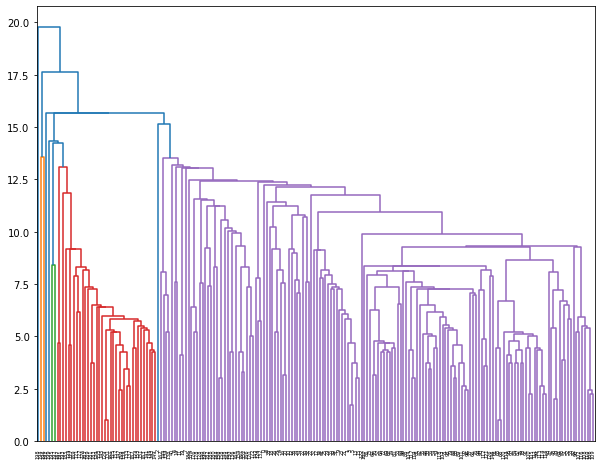

In [34]:
# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

data = np.array(hc_dataframe)

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(data, 'single')
hc.dendrogram(linkage_matrix)

<h2>Experimentation</h2>

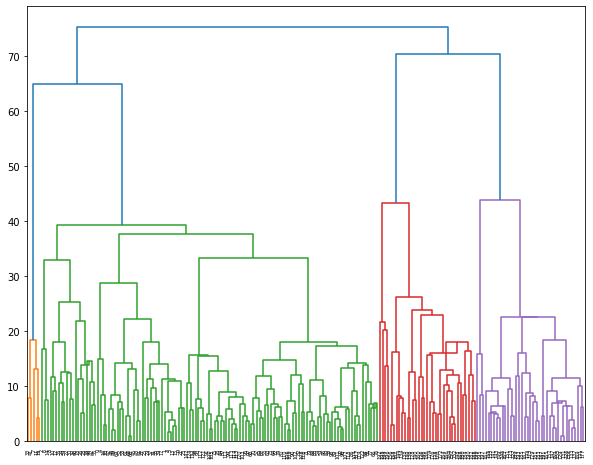

In [35]:
# varying the features

#1
hc_da = hc_dataframe[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

data = np.array(hc_da)

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(data, 'median')
hc.dendrogram(linkage_matrix)

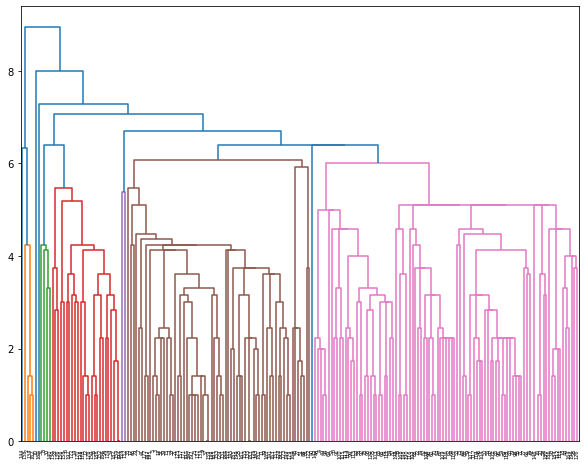

In [36]:

#2
hc_da = hc_dataframe[["Genre","Age","Spending Score (1-100)"]]

# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

data = np.array(hc_da)

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(data, 'single')
hc.dendrogram(linkage_matrix)

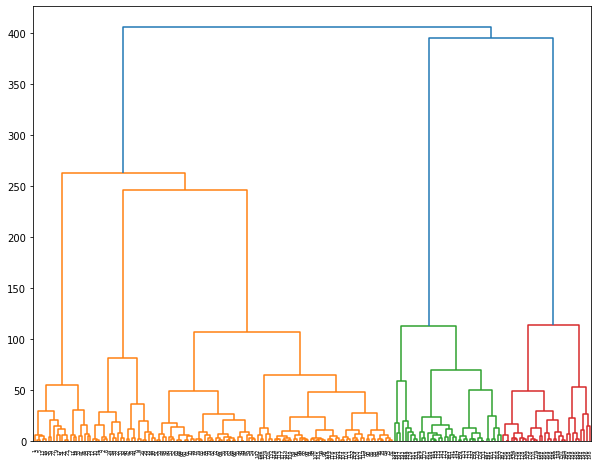

In [37]:

#3
hc_da = hc_dataframe[["Genre","Annual Income (k$)","Spending Score (1-100)"]]

# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

data = np.array(hc_da)

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(data, 'ward')
hc.dendrogram(linkage_matrix)

<h2>Heirarchial Clustering on Gene dataset</h2>

In [38]:
gene_dataframe = pd.read_csv('./problem3-dataset2/gene.csv')

In [39]:
gene_dataframe

ID_REF     GSM613412     GSM613413     GSM613414    GSM613415  \
0   10338001   5192.230000   5974.650000   5393.020000   5158.65000   
1   10338002    301.503000    307.677000    362.596000    372.77600   
2   10338003   1850.110000   2037.540000   1891.180000   1752.97000   
3   10338004    927.983000   1140.820000    936.433000    918.44000   
4   10338005      5.249740      5.017300      5.095850      3.76912   
5   10338006      9.387960      8.481250      8.842170      6.57887   
6   10338007     21.053700     21.974900     20.089100     18.08180   
7   10338008     48.830500     52.573200     48.165400     52.53910   
8   10338009    677.660000    736.404000    913.221000    833.52800   
9   10338010      5.663750      6.366670      4.817760      4.89682   
10  10338011    159.938000    153.161000    179.848000    180.23800   
11  10338012      6.077780      6.899930      5.879660      4.81598   
12  10338013      4.171750      3.707450      4.045620      3.15800   
13  10338014      3.516370      3.979100      3.881400      3.68439   
14  10338015      4.228040      3.554860      3.935910      3.92517   
15  10338016    502.815000    540.120000    633.855000    641.55000   
16  10338017  10933.900000  13993.000000  11860.100000  12107.10000   
17  10338018    268.682000    284.949000    362.186000    370.72500   
18  10338019    101.489000     99.588200    121.828000    122.19700   
19  10338020    463.635000    508.638000    609.197000    608.10200   
20  10338021     10.869900     11.363700     10.528900      9.81449   
21  10338022      8.529890      8.184310      9.229730      6.99232   
22  10338023     23.420900     23.801800     25.423300     27.15610   
23  10338024    324.285000    318.359000    410.300000    424.18700   
24  10338025    778.989000    911.468000    864.857000    786.49300   
25  10338026  12998.800000  15354.800000  12978.300000  13179.30000   
26  10338027    327.894000    348.003000    438.134000    461.20900   
27  10338028     64.516100     63.911400     74.809500     76.21920   
28  10338029   1436.920000   1941.550000   1564.770000   1555.62000   
29  10338030      4.696220      4.706710      4.623350      4.12100   
30  10338031      2.839580      3.266610      3.645730      2.96922   
31  10338032      3.679480      3.897510      3.681080      3.22762   
32  10338033    232.688000    229.680000    287.278000    310.38700   
33  10338034     40.920100     44.639300     41.191400     34.80280   
34  10338035   1011.740000   1109.170000   1010.220000    931.29600   
35  10338036    994.982000   1287.410000   1015.170000    954.25500   
36  10338037    140.905000    208.598000    263.172000    259.58200   
37  10338038      0.006021      0.001961      0.871053      0.75054   
38  10338039    588.679000    611.223000    705.474000    764.96700   
39  10338040     59.609800     58.245700     69.448500     67.11180   
40  10338041   2619.670000   3844.150000   2869.160000   2905.59000   
41  10338042   1419.700000   1783.690000   1539.990000   1378.23000   
42  10338043      2.519230      2.089570      2.414880      2.50475   
43  10338044   4990.030000   6539.160000   5305.390000   5122.29000   
44  10338045    412.888000    637.925000    554.701000    423.63700   
45  10338046     52.846000     55.478500     59.841500     54.44940   
46  10338047    203.933000    373.362000    538.330000    481.27500   
47  10338048     36.660900     38.151300     36.292200     32.14380   
48  10338049    776.873000    878.530000   1009.740000   1004.31000   
49  10338050      3.680730      4.274630      4.492300      3.91677   
50  10338051    121.803000    125.831000    152.816000    154.48700   
51  10338052     13.061200     16.012700     13.734000     11.71690   
52  10338053    437.815000    476.199000    581.702000    602.43200   
53  10338054     72.556700     70.606700     90.670000     92.86140   
54  10338055    566.463000    633.553000    708.877000    732.65200   
55  10338056     85.726700    

In [40]:
np_gene = np.array(gene_dataframe)
np_gene.shape

(58, 13)

In [41]:
# removing gene IDs
np_gene = np_gene[:,1:]

In [42]:
np_gene.shape

(58, 12)

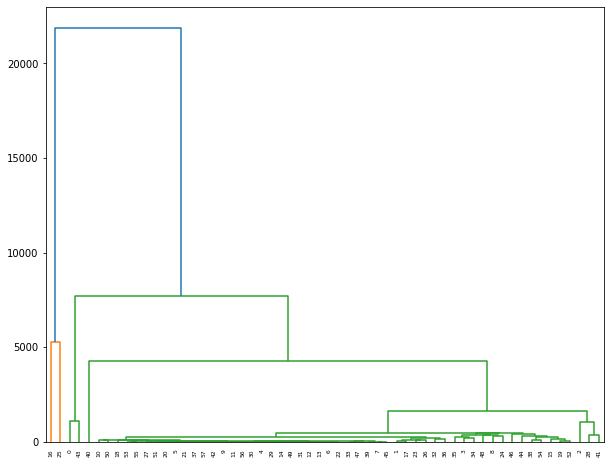

In [43]:
# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(np_gene, 'single')
hc.dendrogram(linkage_matrix)

<h2>Experimentation</h2>

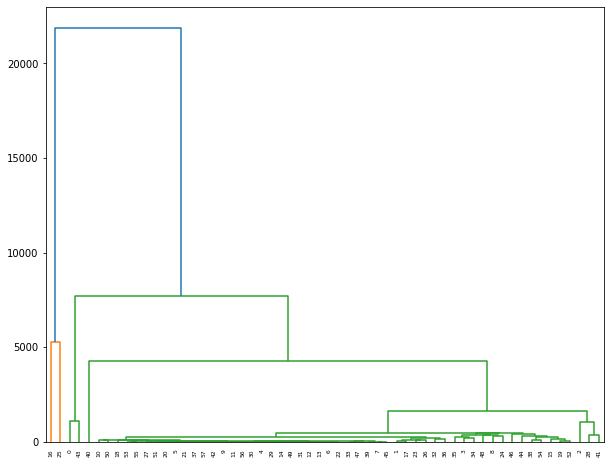

In [47]:
# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(np_gene, 'single')
hc.dendrogram(linkage_matrix)

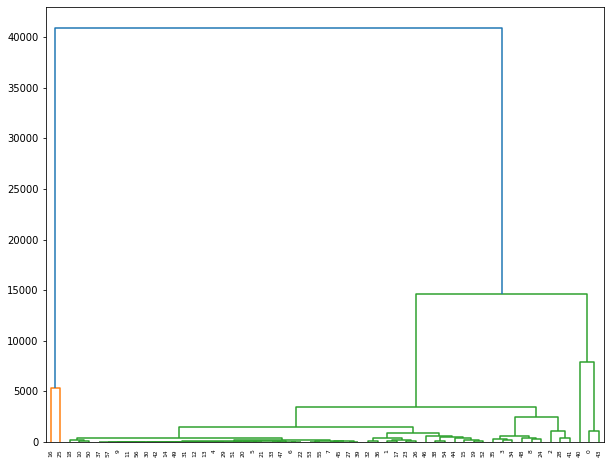

In [48]:
#2

# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(np_gene, 'average')
hc.dendrogram(linkage_matrix)

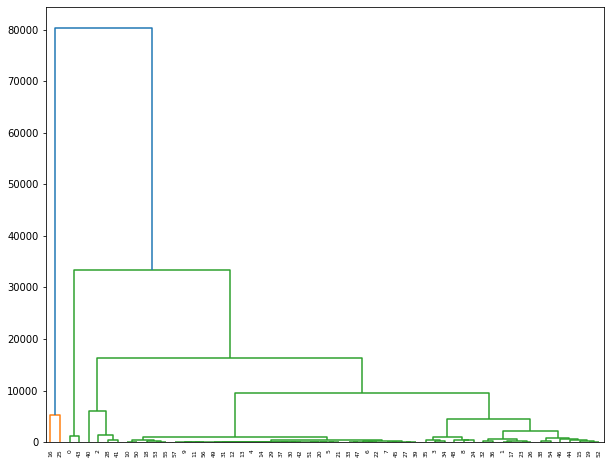

In [49]:
# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(np_gene, 'ward')
hc.dendrogram(linkage_matrix)

## Observations

1) The choice of linkage method significantly impacts the cluster structures obtained.

2) Single linkage is suitable for identifying elongated or non-globular clusters but may lead to chaining and sensitivity to outliers.

3) Average linkage provides a balanced approach and is versatile for various cluster shapes and sizes.

4) Ward's linkage is ideal when aiming for equally sized, compact clusters with minimal within-cluster variance.

5) The choice of linkage should align with the characteristics of the data and the goals of clustering.

In [1]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class PCA:
    
    """
    Standardize the data by subtracting respective means of features
    """
    
    def standardize(self,data_input):
        mean = np.mean(data_input,axis = 0)
        return data_input - mean
    
    """
    Extract the eigen values from X-transpose-X
    X-transpose-X => Covariance matrix
    """
    
    def eigenvalueExtraction(self,data_input):
        std_data = self.standardize(data_input)
        cov_matrix = np.matmul(std_data.T, std_data)
        eigen_vals, eigen_vectors = np.linalg.eig(cov_matrix)
        return std_data,eigen_vals,eigen_vectors
    
    """
    Select k eigen vectors for dimensionality reduction
    """
    
    def dimensionReduction(self,eig_val,eig_vec,k):
        return eig_val[:k],eig_vec[:,:k]
    
    """
    Reconstruction step for the scaled input data (normalized)
    """
    
    def reconstruction(self,scaled_X,eig_vec):
        return np.matmul(scaled_X,eig_vec)

    """
    Master function for applying PCA on a feature vector/vectors
    """
    
    def apply_pca(self,data,k=1):
        A, eigen_vals, eigen_vectors = self.eigenvalueExtraction(data)
        eigen_vals_red , eigen_vectors_red = self.dimensionReduction(eigen_vals,eigen_vectors,k)
        red_output_matrix = self.reconstruction(A,eigen_vectors_red)
        return A,eigen_vals,eigen_vectors,red_output_matrix

In [3]:
# extract black pixels from the image

In [20]:
template = cv2.imread('./problem4-dataset1/tool27.png')

In [21]:
template = template[:,:,0]//3 + template[:,:,1]//3 + template[:,:,2]//3

In [22]:
template.shape

(115, 115)

In [23]:
template

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [24]:
np.unique(template)

array([  0, 255], dtype=uint8)

In [25]:
L = []
for i in range(template.shape[0]):
    for j in range(template.shape[1]):
        if(template[i][j]==0):
            L.append((i,j))

In [26]:
len(L)

713

In [27]:
# Converting to numpy array
np_arr = np.array(L)

In [28]:
np_arr

array([[19, 54],
       [19, 55],
       [19, 56],
       ...,
       [98, 56],
       [98, 57],
       [98, 64]])

In [29]:
np_arr.shape

(713, 2)

<h3>Apply PCA for just getting the eigen vector axis</h3>

In [30]:
pca = PCA()

In [31]:
def plot_line_along_vector(vector,image,image_size=(128, 128)):
    # Create an empty image with a white background
#     image = np.ones((image_size[0], image_size[1], 3))
    
    # Midpoint of the image
    midpoint = np.array([image_size[0] // 2, image_size[1] // 2])
    
    # Use a factor to ensure the line crosses the entire image (This will be large enough for this purpose)
    factor = 1000
    
    start_point = midpoint - factor * vector
    end_point = midpoint + factor * vector

    # Plot the line on the image
    plt.imshow(image)
    
    plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], 'k-',color='red')  # note the y,x order because of how plt.plot works
    
    plt.xlim(0, image_size[0])
    plt.ylim(image_size[1], 0)  # Set the y limit in reverse because of the way images are displayed in matplotlib
    
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


In [32]:
_,_,eigen_vectors,_=pca.apply_pca(np_arr)

In [33]:
eigen_vectors

array([[ 0.99505061, -0.09936945],
       [ 0.09936945,  0.99505061]])

/tmp/ipykernel_209090/2839372075.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], 'k-',color='red')  # note the y,x order because of how plt.plot works


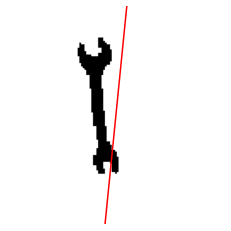

In [34]:
vector = eigen_vectors[0]
vector = vector / np.linalg.norm(vector)

rgb_im = cv2.cvtColor(template,cv2.COLOR_GRAY2BGR)

plot_line_along_vector(vector,rgb_im)

<h3>Rotate all images to the template</h3>

In [35]:
template_vector = eigen_vectors[0]

In [36]:
# check all images for the rotation

In [1]:
# angle calculation by chat gpt
def angle_between_vectors(a, b):
    # Compute the dot product
    dot_product = np.dot(a, b)
    
    # Compute the magnitudes of the vectors
    magnitude_a = np.linalg.norm(a)
    magnitude_b = np.linalg.norm(b)
    
    # Compute the cosine of the angle
    cosine_angle = dot_product / (magnitude_a * magnitude_b)
    
    # Ensure the value lies between -1 and 1 to avoid numerical errors
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)
    
    # Compute the angle and convert to degrees
    angle = np.arccos(cosine_angle)
    angle_degrees = np.degrees(angle)
    
    return angle_degrees

<h3>Algorithm</h3>

In [42]:
import os

root = './problem4-dataset1'
for num,image in enumerate(os.listdir(root)):
    img = cv2.imread(os.path.join(root,image))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    L = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j]==0):
                L.append((i,j))
    np_arr = np.array(L)
    pca = PCA()
    _,_,eigen_vectors,_=pca.apply_pca(np_arr)
    candidate_eig_vector= eigen_vectors[0]
    
    angle_deg = angle_between_vectors(candidate_eig_vector,template_vector)
    height, width = img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 180 + angle_deg, 1.0)

    # Perform the rotation
    rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))
    
    cv2.imwrite(f'./problem4-dataset1-soln/{num}.png',rotated_image)

# Algorithm Flowchart

1. Load the template image.
2. Extract the coordinates of black pixels from the template image.
3. Perform PCA (Principal Component Analysis) on the coordinates to find the first eigen vector (reference line).
4. Load the input image.
5. Extract the coordinates of black pixels from the input image.
6. Perform PCA on the input image coordinates to obtain the corresponding eigen vector.
7. Calculate the angle between the reference vector and the input vector.
8. Rotate the input image by the calculated angle to align the vectors.
9. Save or use the aligned image.
10. Repeat steps 4 to 9 for all images in the KIMIA Dataset.

In [50]:
# showing the montage of images after rotation

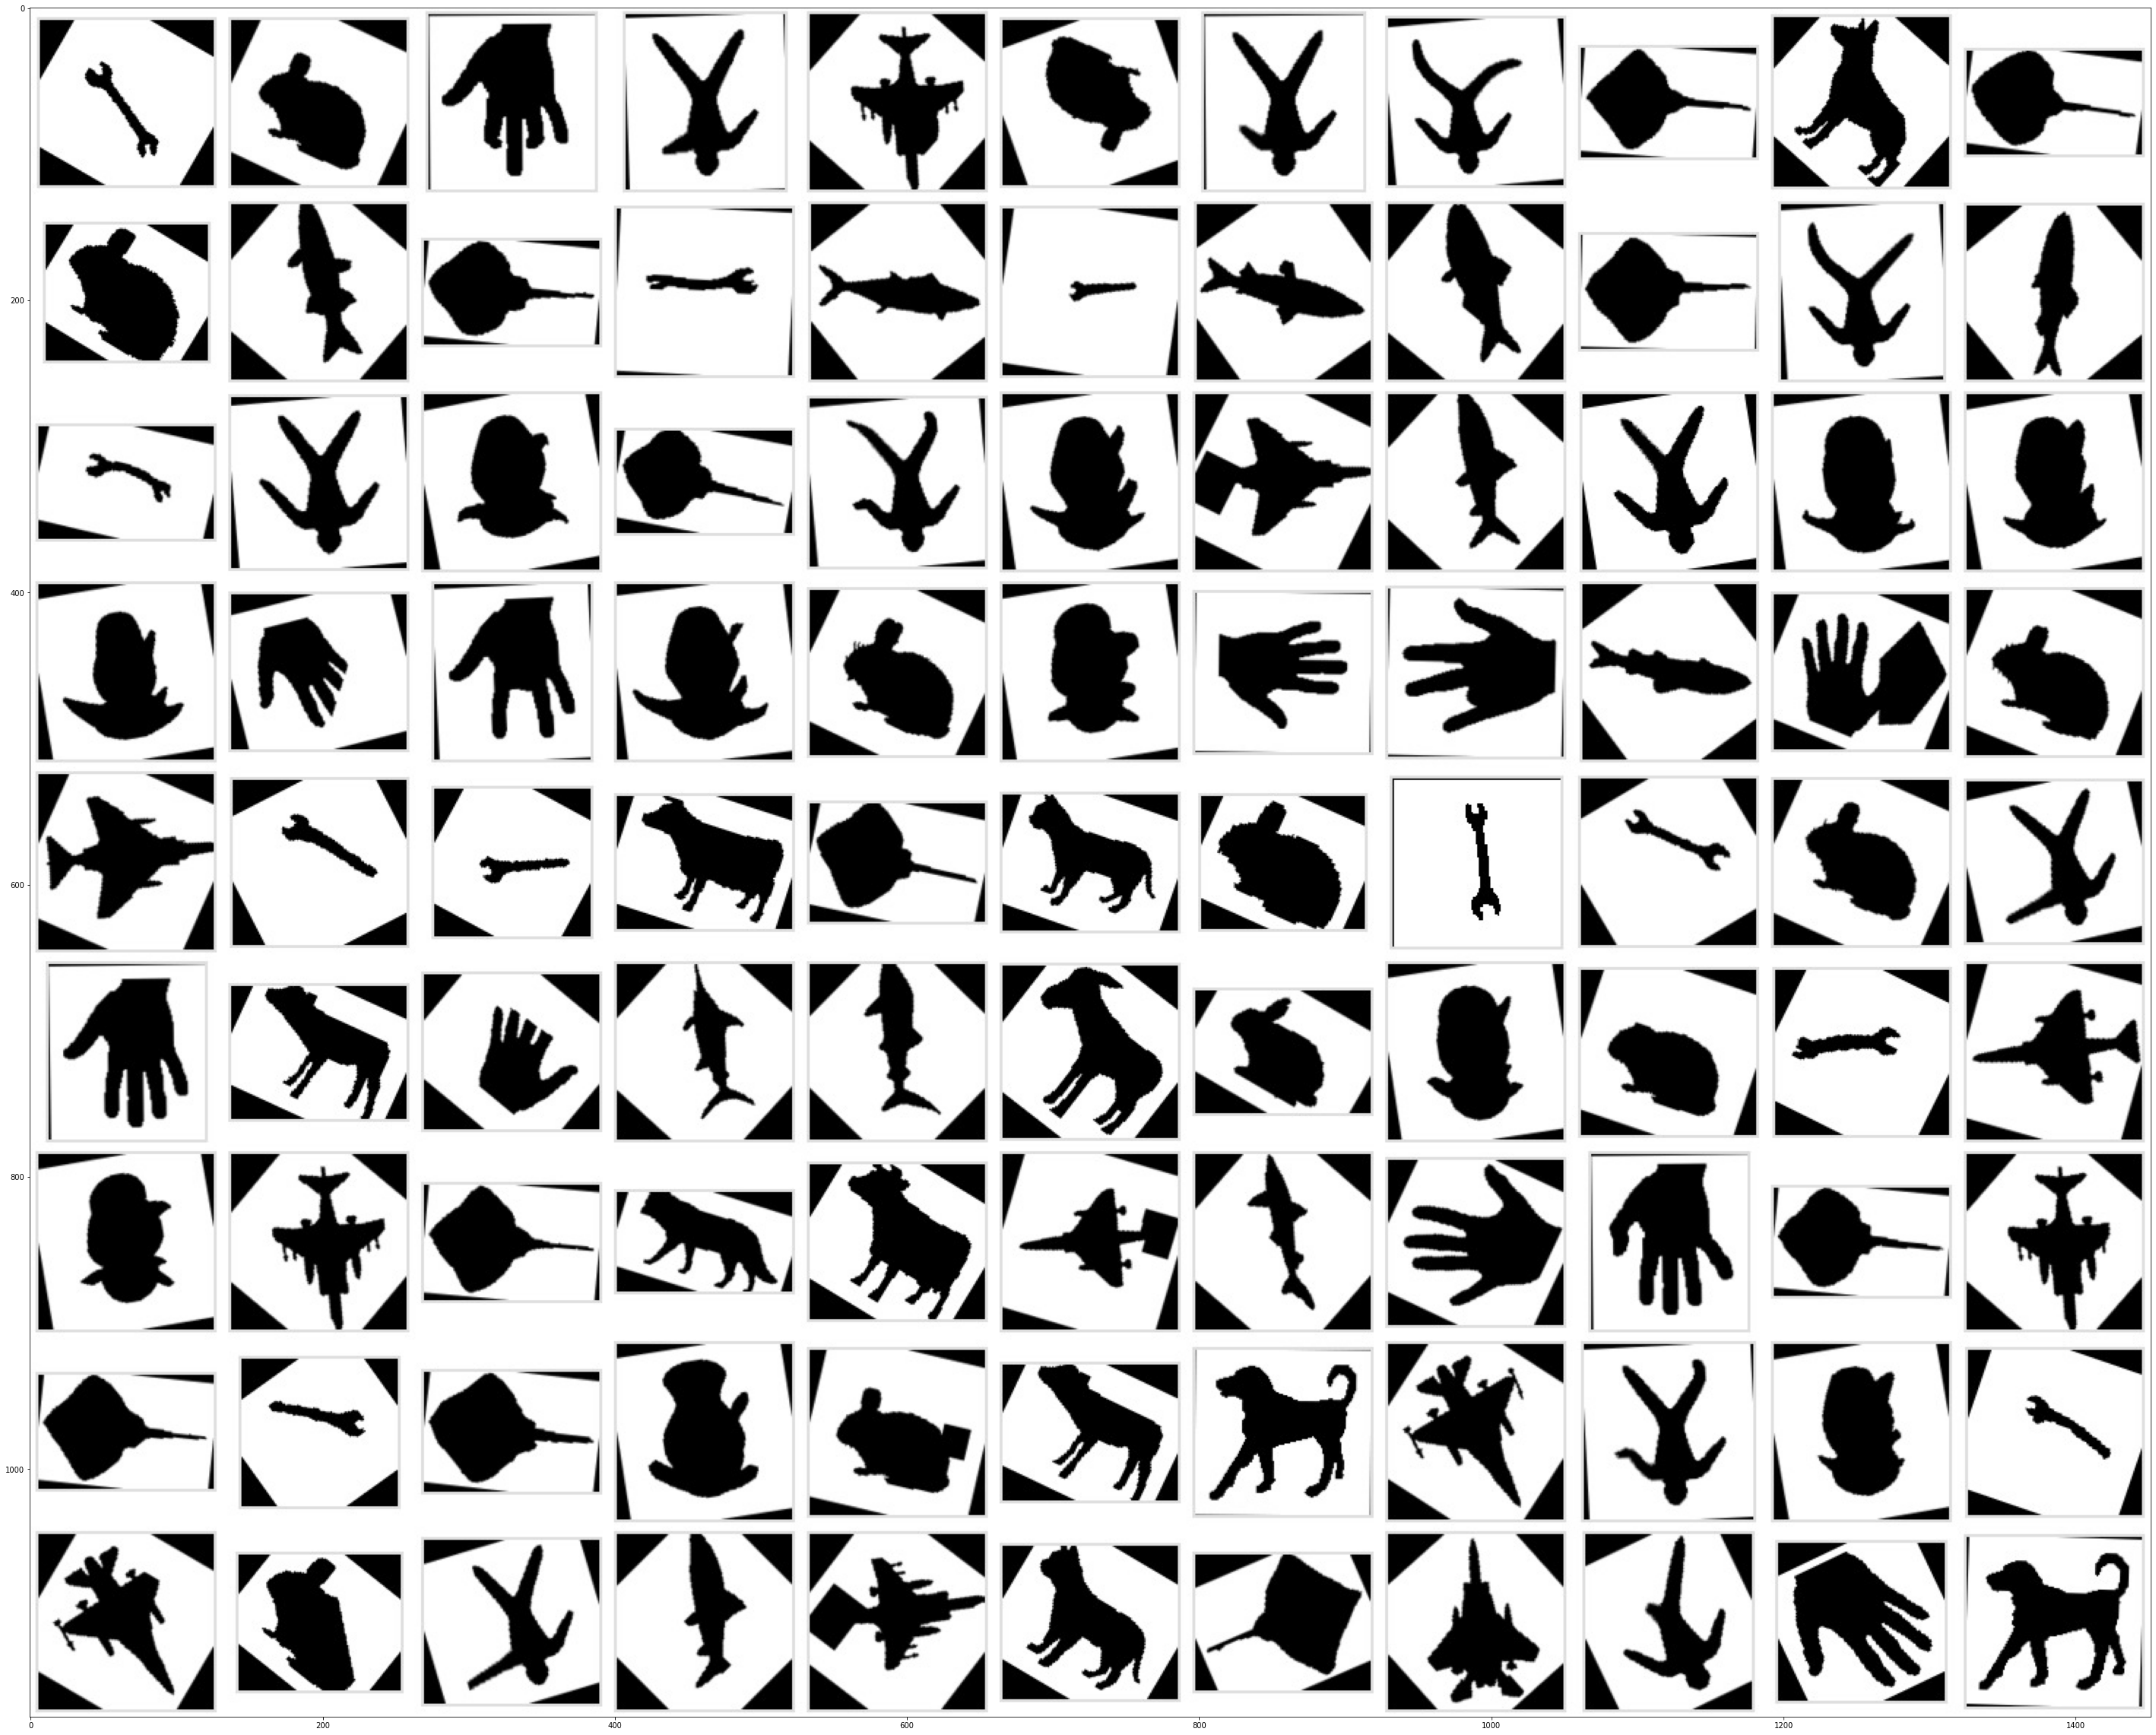

In [51]:
image_collection = cv2.imread('montage.jpg')

fig,axs = plt.subplots(1,1,figsize=(50,50))
axs.imshow(image_collection)
plt.show()

In [24]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

## Hierarchical Clustering on Dataset

**Input:** Given image bounding boxes  
**Output:** Connections between the bounding boxes

---

**Procedure:**

1. Pass the dataset through hierarchical clustering.
2. Pass a `custom_distance` metric to the clustering function and set the linkage to ward.

    ```pseudo
    function custom_distance(bbox1, bbox2):
        # Calculate distance between edge centers of two bounding boxes
        Compute distances between top, left, right, bottom of bbox1 and those of bbox2.
        return minimum of the 16 computed distances
    ```

3. Perform clustering.
   - **Note:** Follow a bottom-to-top progressive approach in the dendrogram.
   
4. Define threshold depending on image type to determine number of levels from bottom.
5. For each cluster in increasing order of levels:
   - Find minimum connecting distance between each pair in the cluster.
   - Maintain a map to improve the connections for matching.

In [25]:
df = pd.read_csv('./problem4-dataset2/CSV/TLBR_68.csv')

In [26]:
df

Unnamed: 0      Top-Left  Bottom-Right   Id
0             0     [290, 85]    [435, 147]    0
1             1     [563, 82]    [730, 147]    1
2             2     [744, 92]    [940, 140]    2
3             3    [1163, 92]   [1184, 147]    3
4             4    [1218, 79]   [1344, 157]    4
..          ...           ...           ...  ...
493         493  [1566, 3264]  [1740, 3315]  493
494         494  [1762, 3261]  [1851, 3315]  494
495         495  [1958, 3261]  [2100, 3312]  495
496         496  [2120, 3250]  [2163, 3315]  496
497         497  [2180, 3254]  [2279, 3309]  497

[498 rows x 4 columns]

In [27]:
np_arr = np.array(df)

In [28]:
top_edge=[]
bottom_edge=[]
right_edge=[]
left_edge=[]

for bbox in np_arr:
    cluster1 = bbox
    tlr = int((cluster1[1].split(',')[0]).split('[')[-1])
    tlc= int((cluster1[1].split(',')[1]).split(']')[-2])

    brr = int((cluster1[2].split(',')[0]).split('[')[-1])
    brc= int((cluster1[2].split(',')[1]).split(']')[-2])

    top_edgec = (tlr,(tlc+brc)/2)
    bottom_edgec = (brr,(tlc+brc)/2)
    left_edgec = ((tlr+brr)/2,tlc)
    right_edgec = ((tlr+brr)/2,brc)
    
    top_edge.append(top_edgec)
    right_edge.append(right_edgec)
    bottom_edge.append(bottom_edgec)
    left_edge.append(left_edgec)

In [29]:
data_points_fc = np_arr

In [30]:
def custom_distance(cluster1, cluster2):
    
    cluster1_array = []
    tlr = int((cluster1[1].split(',')[0]).split('[')[-1])
    tlc= int((cluster1[1].split(',')[1]).split(']')[-2])

    brr = int((cluster1[2].split(',')[0]).split('[')[-1])
    brc= int((cluster1[2].split(',')[1]).split(']')[-2])

    top_edgec = (tlr,(tlc+brc)/2)
    bottom_edgec = (brr,(tlc+brc)/2)
    left_edgec = ((tlr+brr)/2,tlc)
    right_edgec = ((tlr+brr)/2,brc)
    
    cluster1_array.append(top_edgec)
    cluster1_array.append(right_edgec)
    cluster1_array.append(bottom_edgec)
    cluster1_array.append(left_edgec)
    
    cluster2_array = []
    tlr = int((cluster2[1].split(',')[0]).split('[')[-1])
    tlc= int((cluster2[1].split(',')[1]).split(']')[-2])

    brr = int((cluster2[2].split(',')[0]).split('[')[-1])
    brc= int((cluster2[2].split(',')[1]).split(']')[-2])

    top_edgec = (tlr,(tlc+brc)/2)
    bottom_edgec = (brr,(tlc+brc)/2)
    left_edgec = ((tlr+brr)/2,tlc)
    right_edgec = ((tlr+brr)/2,brc)
    
    cluster2_array.append(top_edgec)
    cluster2_array.append(right_edgec)
    cluster2_array.append(bottom_edgec)
    cluster2_array.append(left_edgec)
    
    min_dist = 1e9
    for i in cluster1_array:
        for j in cluster2_array:
            min_dist = min(min_dist,((i[0]-j[0])**2 + (i[1]-j[1])**2)**(1/2))
    return min_dist

In [31]:
from scipy.spatial.distance import pdist, squareform

data_points_fc = np.array(data_points_fc)
print(data_points_fc.shape)

distance_matrix = pdist(np_arr, metric=custom_distance)

(498, 4)


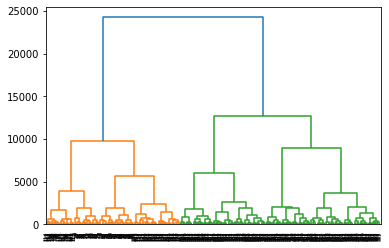

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Use the linkage function with the 'precomputed' method since we already computed our distances
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram
dendrogram(Z)
plt.show()

In [33]:
np.max(Z[:,0])

992.0

In [34]:
print(Z.shape)

(497, 4)


In [35]:
combined_list = [list(item) for item in zip(top_edge, right_edge, bottom_edge, left_edge)]

In [43]:
# chatgpt
def get_levelwise_clusters(linkage_matrix):
    n = linkage_matrix.shape[0] + 1
    clusters = {i: [i] for i in range(n)}
    
    all_clusters = []
    for i in range(n):
        all_clusters.append([i])
    
    for i, (a, b, _, _) in enumerate(linkage_matrix.astype(int)):
        merged = clusters[a] + clusters[b]
        clusters[n + i] = merged
        
        # Remove old clusters
        del clusters[a]
        del clusters[b]
        
        all_clusters.append(merged)
        
    return all_clusters

In [37]:
levelwise_clusters = get_levelwise_clusters(Z)

In [38]:
print(levelwise_clusters)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [156], [157], [15

<h2>Algorithm</h2>

In [39]:
clusters = levelwise_clusters
mp_pts = {}

# edge->(edge,dist)
mp_edge_dist={}
max_uproot = 3

# Let's print the clusters:
ctr=0
ctr_all = 0
mukhya=0
for num, cluster in enumerate(clusters):
    flag=0
    for idx in cluster:
        
        try:
            if(mp_pts[idx]>=max_uproot):
                flag=1
                break
            else:
                mp_pts[idx]+=1
        except:
            mp_pts[idx]=1
            
    if(flag==0):
        if len(cluster)==2:
            mukhya+=1
            
        for i in cluster:
            for j in cluster:
                if(j!=i):
                    min_dist=1e9
                    flagger=0
                    for op1 in range(4):
                        for op2 in range(4):
                            
                            if(((combined_list[i][op1][0]-combined_list[j][op2][0])**2 + (combined_list[i][op1][1]-combined_list[j][op2][1])**2)**(1/2) < min_dist):
                                min_dist = ((combined_list[i][op1][0]-combined_list[j][op2][0])**2 + (combined_list[i][op1][1]-combined_list[j][op2][1])**2)**(1/2)
                                best_params = (idx,min_dist,op1,op2)
                                flagger=1
                    try:
                        if(flagger==1 and mp_edge_dist[str(i)+"---"+str(best_params[2])][2]>best_params[1]):
                            dusra = mp_edge_dist[str(i)+"---"+str(best_params[2])][0]
                            dusraop = mp_edge_dist[str(i)+"---"+str(best_params[2])][1]
                            
                            del mp_edge_dist[str(dusra)+"---"+str(dusraop)]
                            
                            mp_edge_dist[str(i)+"---"+str(best_params[2])] = (j,best_params[3],best_params[1])
                            mp_edge_dist[str(j)+"---"+str(best_params[3])] = (i,best_params[2],best_params[1])
                            
                            
                            ctr+=1
                            
                    except:
                        mp_edge_dist[str(i)+"---"+str(best_params[2])] = (j,best_params[3],best_params[1])
                        mp_edge_dist[str(j)+"---"+str(best_params[3])] = (i,best_params[2],best_params[1])
    
print(mukhya)

220


In [40]:
print(ctr)
print(len(mp_edge_dist.keys()))

91
778


In [41]:
def visualize_bboxes(img,mp_edge_dist,combined_list):
  img_2 = img.copy()

  for key,value in mp_edge_dist.items():
        idx1,or1 = map(int,key.split("---"))
        idx2,or2 = value[0],value[1]
        x1 = int(combined_list[idx1][or1][0])
        y1 = int(combined_list[idx1][or1][1])
        
        x2 = int(combined_list[idx2][or2][0])
        y2 = int(combined_list[idx2][or2][1])
        
#         print(x1,y1,x2,y2)
        line_thickness = 10
        cv2.line(img_2, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)
        
  for index, rows in df.iterrows():
        top_left = (int(rows['Top-Left'].split(',')[0][1:]),int(rows['Top-Left'].split(',')[1][:-1]))
        bottom_right = (int(rows['Bottom-Right'].split(',')[0][1:]),int(rows['Bottom-Right'].split(',')[1][:-1]))
        cv2.rectangle(img_2, top_left, bottom_right, (0, 0, 255), 2)
    
  fig,axs = plt.subplots(1,1,figsize=(40,70))
  axs.imshow(img_2)
  plt.axis('off')
  plt.savefig('./sample.png')


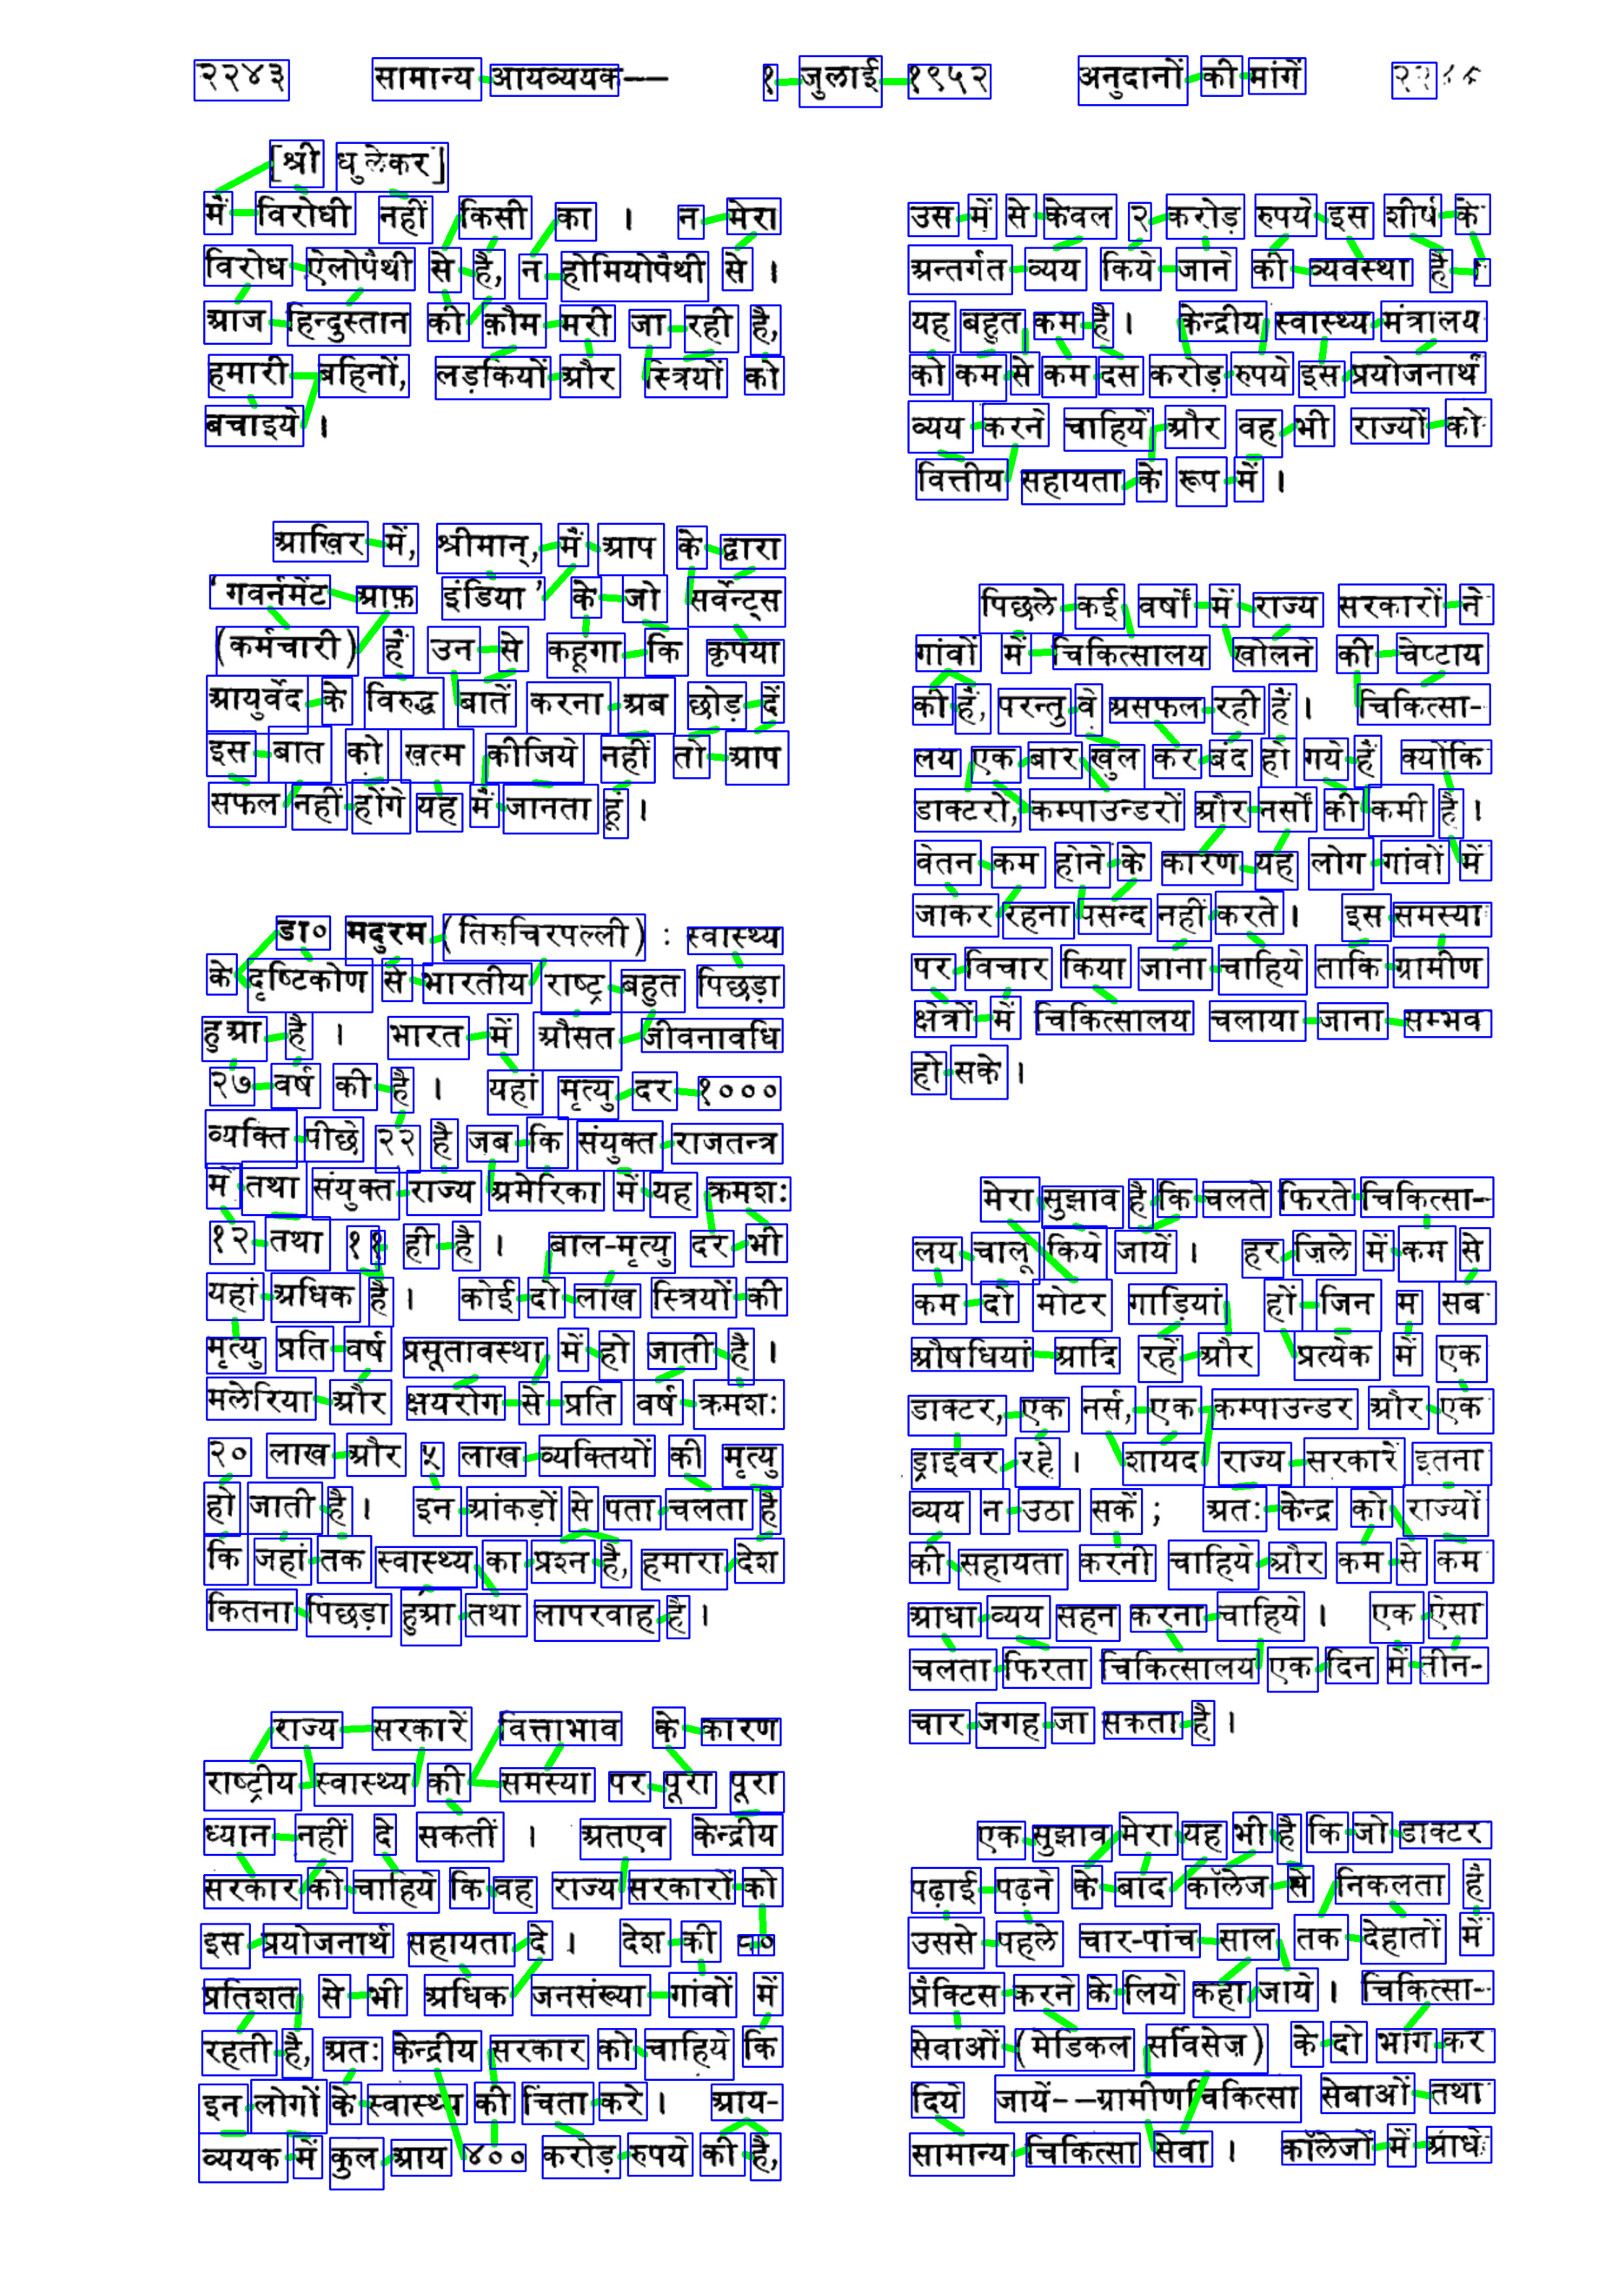

In [42]:
image = cv2.imread('./problem4-dataset2/images/68.jpg')
visualize_bboxes(image,mp_edge_dist,combined_list)

In [1]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from scipy.stats import multivariate_normal
import pandas as pd
import sklearn
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [2]:
with open('./problem4-dataset3/colors.pkl','rb') as file:
    data = pickle.load(file)
data.shape

(100, 2)

In [3]:
# from earlier question
class GMM():
    def __init__(self):
        self.weights = None
        self.means = None
        self.covariances = None
        self.n_components = None

    def initialize_parameters(self, data, n_components):
        self.n_components = n_components
        self.weights = np.ones(self.n_components) / self.n_components
        self.reduced_pca_data = data
        self.means = self.reduced_pca_data[np.random.choice(self.reduced_pca_data.shape[0], self.n_components, replace=False), :]
        self.covariances = [np.cov(self.reduced_pca_data, rowvar=False)] * self.n_components

    def e_step(self, data):
        responsibilities = np.zeros((data.shape[0], self.n_components))
        for i in range(self.n_components):
            responsibilities[:, i] = self.weights[i] * multivariate_normal(self.means[i], self.covariances[i]).pdf(data)
        
        responsibilities = responsibilities / responsibilities.sum(axis=1, keepdims=True)
        
        return responsibilities

    def m_step(self, data, responsibilities):
        for i in range(self.n_components):
            weight = responsibilities[:, i].sum()
            mean = (data * responsibilities[:, i, np.newaxis]).sum(axis=0) / weight
            covariance = np.dot((responsibilities[:, i, np.newaxis] * (data - mean)).T, (data - mean)) / weight

            self.weights[i] = weight / data.shape[0]
            self.means[i] = mean
            self.covariances[i] = covariance

    def compute_log_likelihood(self):
        log_likelihood = 0
        for i in range(self.n_components):
            log_likelihood += self.weights[i] * multivariate_normal(self.means[i], self.covariances[i]).pdf(self.reduced_pca_data)
        return np.log(log_likelihood).sum()

    def fit(self, data, n_components,tol=1e-4, max_iter=10000):
        self.initialize_parameters(data, n_components)
        log_likelihood = 0
        for iteration in range(max_iter):
            responsibilities = self.e_step(self.reduced_pca_data)
            self.m_step(self.reduced_pca_data, responsibilities)
            new_log_likelihood = self.compute_log_likelihood()
            
            if abs(new_log_likelihood - log_likelihood) < tol:
                break
            log_likelihood = new_log_likelihood

    def get_parameters(self):
        return {
            "weights": self.weights,
            "means": self.means,
            "covariances": self.covariances
        }

    def predict(self, data):
        likelihoods = np.zeros((data.shape[0], self.n_components))
        for i in range(self.n_components):
            likelihoods[:, i] = self.weights[i] * multivariate_normal(self.means[i], self.covariances[i]).pdf(data)
        return likelihoods

    def predict_membership(self):
        responsibilities = self.e_step(self.reduced_pca_data)
        return responsibilities.argmax(axis=1)

    def compute_aic(self):
        k = self.n_components * (self.reduced_pca_data.shape[1] + self.reduced_pca_data.shape[1] * (self.reduced_pca_data.shape[1] + 1) / 2 + 1)
        log_likelihood = self.compute_log_likelihood()
        aic = 2*k - 2*log_likelihood
        return aic

    def compute_bic(self):
        k = self.n_components * (self.reduced_pca_data.shape[1] + self.reduced_pca_data.shape[1] * (self.reduced_pca_data.shape[1] + 1) / 2 + 1)
        log_likelihood = self.compute_log_likelihood()
        bic = np.log(self.reduced_pca_data.shape[0]) * k - 2 * log_likelihood
        return bic

In [4]:
gmm_model = GMM()

In [5]:
gmm_model.fit(data,n_components=7)

In [6]:
gmm_model.get_parameters()

{'weights': array([0.17      , 0.17      , 0.29      , 0.08      , 0.2       ,
        0.03070919, 0.05929081]),
 'means': array([[ 9.95904977e-02,  1.26934805e+02],
        [ 2.55165668e+02,  1.27358500e+02],
        [ 1.93150109e+02, -1.48663771e-01],
        [ 1.26931688e+02,  2.54851953e+02],
        [ 1.27172922e+02,  1.26605367e+02],
        [-1.85056695e-01,  2.54263077e+02],
        [ 5.01806524e-01,  2.54650281e+02]]),
 'covariances': [array([[1.6740456 , 0.30152784],
         [0.30152784, 0.89468441]]),
  array([[ 1.02962702, -0.03525602],
         [-0.03525602,  0.57207545]]),
  array([[ 4.07655137e+03, -4.05464852e+00],
         [-4.05464852e+00,  8.42238281e-01]]),
  array([[1.09300803, 0.05372962],
         [0.05372962, 0.93233438]]),
  array([[ 1.19754433, -0.01923169],
         [-0.01923169,  1.70463677]]),
  array([[1.12718393, 1.37309409],
         [1.37309409, 1.75186213]]),
  array([[ 1.74245176, -0.04455929],
         [-0.04455929,  0.03684222]])]}

In [7]:
# predict cluster for each point
predictions = gmm_model.predict_membership()

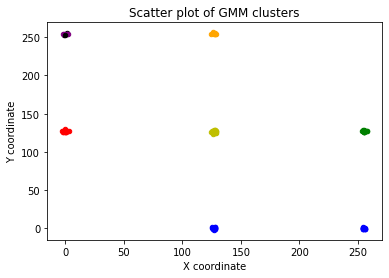

In [8]:
# making a plot for scatter
color = ['r','g','b','orange','y','black','purple']
for i,sample in enumerate(data):
    plt.scatter(sample[0],sample[1],s=20,color=color[predictions[i]])
plt.title('Scatter plot of GMM clusters')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

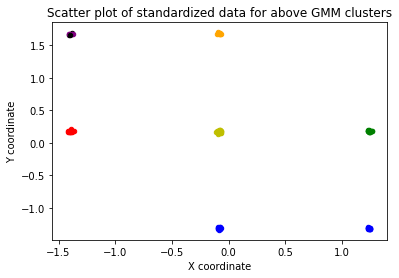

In [9]:
# after standardizing a more clear view
color = ['r','g','b','orange','y','black','purple']

std_data = (data-np.mean(data,axis=0))/np.std(data,axis=0)
for i,sample in enumerate(std_data):
    plt.scatter(sample[0],sample[1],s=20,color=color[predictions[i]])
plt.title('Scatter plot of standardized data for above GMM clusters')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

>

<h3>Generating data from the Gaussian Components</h3>

In [21]:
def generate_dataset(n, means, covariances,cluster_labels):
    data = []

    for i in range(n):
        # generates 200 samples from each gauissian
        each_sample_data = np.random.multivariate_normal(means[i], covariances[i], size=200)
        for da in range(200):
            cluster_labels.append(i)
        data.append(each_sample_data)

    dataset = np.vstack(data)
    return dataset

In [22]:
# number of components, means and covariances
n = 2
clusters_labels=[]
means = np.array([[2, 2], [5, 5]])
covariances = np.array([
    [[2, 0], [3, 0]],
    [[0, 1], [0, 1]]
])

sample_dataset = generate_dataset(n, means, covariances,clusters_labels)
print(sample_dataset.shape)

(400, 2)


/tmp/ipykernel_226373/2446119882.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  each_sample_data = np.random.multivariate_normal(means[i], covariances[i], size=200)


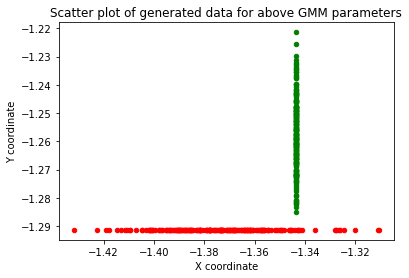

In [24]:
# making a plot

# after standardizing a more clear view
color = ['r','g','b','orange','y','black','purple']

std_data = (sample_dataset-np.mean(data,axis=0))/np.std(data,axis=0)

for i,sample in enumerate(std_data):
    plt.scatter(sample[0],sample[1],s=20,color=color[clusters_labels[i]])
    
plt.title('Scatter plot of generated data for above GMM parameters')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

## Observations

1) The mean of the sample observation is close to the mean of the component, indicating a typical value for that cluster.

2) Since we have multiple Gaussian components, the data generated from a particular component, that particular sample of data is going to belong to the cluster associated with that particular mean as observed by the plot also.